# **Home Credit Default Risk Group4 Phase 2**

# **1. Project Background**

## **1.1 Title:** **Leveraging Machine Learning to Predict Loan Defaults**

## **1.2. Team and Phase Leader Plan**

| Name           | Email             | Role              | Photo                           |
|----------------|-------------------|-------------------|---------------------------------|
| Lexi Colwell   | alecolwe@iu.edu   | Phase 1 Lead      | <img src="https://iu.instructure.com/images/thumbnails/177973973/0g37V233Y26RuFrO4SpckMxeO237lTphfcshwCPB" width="50">   |
| Nasheed Jafri  | njafri@iu.edu     | Phase 2 Lead      | <img src="https://iu.instructure.com/images/thumbnails/126314916/QRUIEEkso27JL5B1T8aFYUsG72QVtz5EJD4gfe1Z" width="50">|
| Cassie Cagwin  | cacagwin@iu.edu   | Phase 3 Lead      | <img src="https://www.widsworldwide.org/wp-content/uploads/2023/10/1-6-scaled.jpeg" width="50"> |
| Maria Aroca    | mparoca@iu.edu    | Phase 4 Lead      | <img src="https://media.licdn.com/dms/image/v2/C4E03AQHBCzQVjfUjYA/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1589987573488?e=1736985600&v=beta&t=RIOl6PYoXLUqfTFXW5VMpFm9l1zGIvd2u5-y0k59jCk" width="50">  |

| Phase         | Task Description                                                                                     | Project Manager    |
|---------------|------------------------------------------------------------------------------------------------------|--------------------|
| Phase 1       | Project planning and proposal, including data sources, metrics, and baseline models                  | Lexi Colwell       |
| Phase 2       | Data exploration (EDA), baseline pipeline, feature engineering, and initial hyperparameter tuning    | Nasheed Jafri      |
| Phase 3       | Advanced feature engineering, hyperparameter tuning, feature selection, and ensemble methods         | Cassie Cagwin      |
| Phase 4       | Final model integration, implementing advanced architectures, and project report completion          | Maria Aroca        |

## **1.3. Credit Assignment Plan (SMART Goals)**



The table below provides an overview of each task, its assignee, and the corresponding deadline for Phase 2 of the project

<br>

**<p>Phase 2 Credit Assignment Plan Summary</p>**

| Name     | Task Description                                                                                     | Estimated Time    |
|---------------|------------------------------------------------------------------------------------------------------|--------------------|
| Lexi Colwell      | EDA and feature engineering on Bureau and Bureau Balance data, Aggregation to train data                 | 15 hrs      |
| Nasheed Jafri       | EDA and feature engineering on Credit Card Balance data, Report, Submission of material    | 15 hrs      |
| Cassie Cagwin      | EDA and feature engineering on Application data, Building pipelines, Running Experiments        | 20 hrs     |
| Maria Aroca       | EDA and feature engineering on POS and Installments data, Building pipelines, Running Experiments          | 20 hrs       |

## **1.4 Project Abstract**

In Phase 2 of the Home Credit Default Risk project, we focused on developing a baseline predictive model using Logistic Regression to forecast loan defaults. Our main objective was to conduct data exploration and feature engineering to build a preliminary model pipeline. This phase encompassed comprehensive data preprocessing, including aggregation of client financial behavior data from various sources along a unique identifier feature for each applicant. The baseline pipeline integrated imputation, target encoding, and scaling techniques. Our experiments yielded an accuracy of 0.92, but a modest ROC-AUC score of 0.61, highlighting areas for further refinement. These findings establish a solid baseline for more sophisticated modeling and serve as a critical step toward understanding loan default risk prediction.

## **1.5 Introduction**

In Phase 2 of our Home Credit Default Risk project, we focus on building a baseline model for predicting loan default risk using Logistic Regression. Logistic Regression is straightforward, interpretable, and effective for binary classification tasks so it will serve as a good baseline.

This phase involves multiple steps, starting with downloading and preparing the dataset, which is derived from the Home Credit Default Risk Kaggle competition. The dataset encompasses extensive information, including current loan applications, demographic information, financial records, and historical credit behavior from multiple sources like credit bureau reports, monthly balances, and repayment histories. These diverse datasets present both a wealth of information and significant challenges due to their size, heterogeneity and varying format.

A comprehensive Exploratory Data Analysis (EDA) is conducted on the main train and test data, as well as on each of the seconday datasets, to understand the structure and nuances of the data. This includes examining variable distributions, identifying relationships with the target variable (loan default risk), and addressing challenges such as missing values and feature correlations. Key insights from EDA are used to inform the feature engineering process, where raw variables are transformed, aggregated, and aligned with the main training data (`application_train.csv`) based on the unique identifier `SK_ID_CURR`.

Feature engineering plays a critical role in this phase. Aggregations from secondary datasets, such as average credit balances, counts of previous loans, and overdue amounts, are generated to complement the main training dataset. These engineered features aim to capture the financial behavior of clients comprehensively and improve the predictive power of the baseline model.

The baseline logistic regression model is built within a pipeline that integrates preprocessing, feature scaling, and model training. This pipeline provides a systematic and replicable structure, which is critical for scalability and future improvements.

This report presents detailed documentation of the EDA findings, feature engineering process, and baseline model results. A block diagram of the pipeline workflow and experimental results table to further contextualize the approach and outcomes is provided below. This work sets the stage for Phase 3, where advanced feature engineering, hyperparameter tuning, and better performing ML algorithms will be explored to improve performance.

# **2. Data**

## **2.1 Data Description**
We will use the data uploaded to the [Home Credit Default Risk kaggle](https://www.kaggle.com/competitions/home-credit-default-risk/data) competition project page.

The data for this project represents a comprehensive and diverse collection of data sources related to credit applications and repayment behaviors, making it both rich in detail and complex to work with. This data includes current loan applications with static demographic and financial information, Credit Bureau reports with historical data from other financial institutions, monthly balances on various credit accounts such as credit cards and POS (point of sale) loans, and detailed repayment histories that capture installment payments, including missed or late payments, across multiple credit types. Additionally, it includes information on previous loan applications within Home Credit, providing an in-depth look at each client’s financial profile and credit history over time. The combination of these sources results in a broad dataset that offers valuable insights into repayment patterns and client behavior but also presents significant challenges.

A primary challenge with this data is its heterogeneity; each source captures unique aspects of a client’s financial behavior, often in different formats. Some datasets provide static information, while others track monthly balances, leading to a mix of snapshot and time-series data that must be carefully aligned. Additionally, the data spans inconsistent collection periods, complicating synchronization across timeframes. This complexity requires thoughtful feature engineering to capture each client’s creditworthiness effectively. Below, we describe each of the tables in detail.

### ***Application_train.csv*** and ***application_test.csv***


(307k rows, 122 columns) is the primary data set for this project. This file contains data about clients and their current application and information about the applicant. There is a similar ‘application_test.csv’ file containing our test data (49k rows, 121 columns, it does not contain TARGET). After dropping some redundant/highly correlated columns, the following columns might be retained from this data:

| Variable                     | Description |
|------------------------------|-------------|
| AMT_ANNUITY                  | Loan annuity |
| AMT_CREDIT                   | Credit amount of the loan |
| AMT_INCOME_TOTAL             | Income of the client |
| AMT_REQ_CREDIT_BUREAU_DAY    | Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application) |
| AMT_REQ_CREDIT_BUREAU_HOUR   | Number of enquiries to Credit Bureau about the client one hour before application |
| AMT_REQ_CREDIT_BUREAU_MON    | Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) |
| AMT_REQ_CREDIT_BUREAU_QRT    | Number of enquiries to Credit Bureau about the client 3 months before application (excluding one month before application) |
| AMT_REQ_CREDIT_BUREAU_WEEK   | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application) |
| AMT_REQ_CREDIT_BUREAU_YEAR   | Number of enquiries to Credit Bureau about the client one year (excluding last 3 months before application) |
| APARTMENTS_AVG               | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| BASEMENTAREA_AVG             | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| CNT_CHILDREN                 | Number of children the client has |
| CODE_GENDER                  | Gender of the client |
| COMMONAREA_AVG               | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| DAYS_BIRTH                   | Client's age in days at the time of application |
| DAYS_EMPLOYED                | How many days before the application the person started current employment |
| DAYS_ID_PUBLISH              | How many days before the application did client change the identity document with which they applied for the loan |
| DAYS_LAST_PHONE_CHANGE       | How many days before application did client change phone |
| DAYS_REGISTRATION            | How many days before the application did client change their registration |
| DEF_30_CNT_SOCIAL_CIRCLE     | How many observations of client's social surroundings defaulted on 30 DPD (days past due) |
| ENTRANCES_AVG                | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| EXT_SOURCE_1 - 3             | Normalized score from external data source |
| FLAG_CONT_MOBILE             | Was mobile phone reachable (1=YES, 0=NO) |
| FLAG_DOCUMENT_1 - 21         | Did client provide document 1 - 21 |
| FLAG_EMAIL                   | Did client provide email (1=YES, 0=NO) |
| FLAG_OWN_CAR                 | Flag if the client owns a car |
| FLAG_OWN_REALTY              | Flag if client owns a house or flat |
| FLAG_PHONE                   | Did client provide home phone (1=YES, 0=NO) |
| FLAG_WORK_PHONE              | Did client provide work phone (1=YES, 0=NO) |
| FLOORSMAX_AVG                | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| FLOORSMIN_AVG                | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| LANDAREA_AVG                 | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| LIVE_CITY_NOT_WORK_CITY      | Flag if client's contact address does not match work address (1=different, 0=same, at city level) |
| NAME_CONTRACT_TYPE           | Identification if loan is cash or revolving |
| NAME_EDUCATION_TYPE          | Level of highest education the client achieved |
| NAME_FAMILY_STATUS           | Family status of the client |
| NAME_HOUSING_TYPE            | What is the housing situation of the client (renting, living with parents, etc.) |
| NAME_INCOME_TYPE             | Client's income type (businessman, working, maternity leave, etc.) |
| NAME_TYPE_SUITE              | Who was accompanying client when they applied for the loan |
| NONLIVINGAPARTMENTS_AVG      | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| NONLIVINGAREA_AVG            | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| OBS_30_CNT_SOCIAL_CIRCLE     | How many observations of client's social surroundings with observable 30 DPD (days past due) default |
| OCCUPATION_TYPE              | What kind of occupation the client has |
| ORGANIZATION_TYPE            | Type of organization where client works |
| OWN_CAR_AGE                  | Age of client's car |
| REG_REGION_NOT_WORK_REGION   | Flag if client's permanent address does not match work address (1=different, 0=same, at region level) |
| REGION_POPULATION_RELATIVE   | Normalized population of region where client lives (higher number means the client lives in a more populated region) |
| REGION_RATING_CLIENT         | Rating of the region where client lives (1,2,3) |
| SK_CURR_ID                   | ID of loan in our sample |
| TARGET                       | Target variable (1 - client with payment difficulties: they had a late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) |
| YEARS_BEGINEXPLUATATION_AVG  | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |
| YEARS_BUILD_AVG              | Normalized information about building where the client lives. What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floors |



### ***Previous_application.csv***
(1.7 million rows, 37 columns) This table contains information about clients’ previous credit applications for Home Credit loans of clients who have loans in the train and test data sets.  There is one row for each previous application.One SK_ID_CURR can have multiple rows of previous applications in this table. After dropping some redundant/highly correlated columns, and aggregating the following columns might be retained from this data:

| Variable                          | Description |
|-----------------------------------|-------------|
| SK_ID_CURR                        | ID of loan in our sample |
| PREV_AMT_APPLICATION_MEAN         | Mean of how much credit the client asked for on previous applications |
| PREV_AMT_APPLICATION_SUM          | Total amount of how much credit the client asked for on all previous applications |
| PREV_AMT_CREDIT_MEAN              | Mean of how much credit the client was approved for on previous applications |
| PREV_AMT_CREDIT_SUM               | Total amount of how much credit the client was approved for on previous applications |
| PREV_AMT_DOWN_PAYMENT_MEAN        | Mean of down payments on all previous applications |
| PREV_AMT_DOWN_PAYMENT_SUM         | Total amount of down payments on all previous applications |
| PREV_AMT_ANNUITY_MEAN             | Mean of annuity for all previous applications |
| PREV_AMT_ANNUITY_SUM              | Total sum of annuity for all previous applications |
| PREV_CNT_PAYMENT_MEAN             | Mean of terms of previous credit at application of the previous applications |
| PREV_CNT_PAYMENT_SUM              | Total sum of terms of previous credit at application of the previous applications |
| PREV_APPROVED_SUM                 | Total number of approved applications for `SK_ID_CURR` |
| PREV_REFUSED_SUM                  | Total number of refused applications for `SK_ID_CURR` |
| PREV_CANCELED_SUM                 | Total number of canceled applications for `SK_ID_CURR` |
| PREV_APPROVAL_RATE                | Total number of approved applications / Total number of applications |
| PREV_CREDIT_APPLICATION_RATIO_MEAN | `PREV_AMT_CREDIT_MEAN` / `PREV_AMT_APPLICATION_MEAN` |

### ***credit_card_balance.csv***
(3.8 million rows, 23 columns) This dataset contains monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows. After dropping some redundant/highly correlated columns, the following columns might be retained from this data:

| Variable                     | Description |
|------------------------------|-------------|
| SK_ID_PREV                   | ID of previous credit in Home Credit related to loan. (One loan in their sample can have 0, 1, 2, or more previous loans in Home Credit) |
| SK_ID_CURR                   | ID of loan in their sample |
| MONTHS_BALANCE               | Month of balance relative to application date (-1 means the freshest balance date) |
| AMT_BALANCE                  | Balance during the month of previous credit |
| AMT_CREDIT_LIMIT_ACTUAL      | Credit card limit during the month of the previous credit |
| AMT_DRAWINGS_CURRENT         | Amount drawing during the month of the previous credit |
| AMT_PAYMENT_TOTAL_CURRENT    | How much did the client pay during the month in total on the previous credit |
| CNT_DRAWINGS_CURRENT         | Number of drawings during this month on the previous credit |
| CNT_INSTALMENT_MATURE_CUM    | Number of paid installments on the previous credit |
| NAME_CONTRACT_STATUS         | Contract status (Active, Approved, Completed, Demand, Refused, Sent proposal, Signed) on the previous credit |
| SK_DPD_DEF                   | DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit |

### ***Bureau.csv***
(1.7 million rows, 17 columns) This table contains information about clients’ previous credits provided by other financial institutions. One SK_ID_CURR can have multiple rows of previous credit in this table. After dropping some redundant/highly correlated columns, the following columns might be retained from this data:

| Variable                     | Description |
|------------------------------|-------------|
| SK_ID_CURR                   | ID of loan in the sample |
| SK_BUREAU_ID                 | ID used to join with `bureau_balance` features if needed |
| CREDIT_ACTIVE                | Status of Credit Bureau reported credits |
| DAYS_CREDIT                  | Number of days before the current application when the client applied for Credit Bureau credit |
| CREDIT_DAY_OVERDUE           | Number of days past due on Credit Bureau credit at the time of application for the related loan in the sample |
| DAYS_CREDIT_ENDDATE          | Remaining duration of CB credit (in days) at the time of application |
| AMT_CREDIT_MAX_OVERDUE       | Maximum amount overdue on the Credit Bureau credit at the application date of the loan in the sample |
| CNT_CREDIT_PROLONG           | Number of times the Credit Bureau credit was prolonged |
| AMT_CREDIT_SUM               | Current credit amount for the Credit Bureau credit |
| AMT_CREDIT_SUM_DEBT          | Current debt on the Credit Bureau credit |
| AMT_CREDIT_SUM_LIMIT         | Current credit limit of a credit card reported in Credit Bureau |
| AMT_CREDIT_SUM_OVERDUE       | Current amount overdue on the Credit Bureau credit |
| CREDIT_TYPE                  | Type of credit (e.g., car loan, cash loan, etc.) |
| AMT_ANNUITY                  | Annuity of the Credit Bureau credit |


### ***Bureau_balance.csv***
(27 million rows, 3 columns) This table contains monthly balances for previous credits. There is one row for each month of history for every previous credit that was reported to the credit bureau.

| Variable         | Description |
|------------------|-------------|
| SK_BUREAU_ID   | ID used to join with bureau features if needed |
| MONTHS_BALANCE   | Month of balance relative to application date |
| STATUS           | Status of the credit loan during the month |


### ***POS_CASH_balance.csv***
(10 million rows, 8 columns) This dataset provides monthly balance snapshots for previous Point of Sale (POS) and cash loans that the applicants had with Home Credit. Each row represents one month of repayment history for a given credit, including both consumer credit and cash loans linked to loans in the current sample. The dataset captures detailed, time-based information on each credit account’s status, payment terms, and any overdue payments. Each entry is associated with a unique credit and represents one monthly observation, covering the loan's status, remaining installments, and potential overdue days.

| Variable               | Description |
|------------------------|-------------|
| SK_ID_PREV             | Identifier for each previous credit associated with the loans in the sample. This allows linking multiple rows to a single previous credit, recording monthly snapshots of the credit status. |
| SK_ID_CURR             | Identifier for the current loan in the sample, connecting each record back to the specific loan application. |
| MONTHS_BALANCE         | The number of months relative to the loan application date for each balance snapshot. A value of -1 represents the most recent monthly snapshot. This field allows for chronological tracking of credit history. |
| CNT_INSTALMENT         | The number of installments in the original term of the previous credit. |
| CNT_INSTALMENT_FUTURE  | The number of remaining installments on the previous credit. This variable helps track repayment progress and indicates how much of the loan is still unpaid. |
| NAME_CONTRACT_STATUS   | The status of the credit contract during each monthly snapshot. Possible statuses include “Active,” “Completed,” and “Past Due,” among others. This variable is useful for tracking whether the loan was repaid on time, still ongoing, or completed. |
| SK_DPD                 | Days Past Due (DPD) during the month for the previous credit. This field indicates the number of days by which the payment was overdue in that month, if any, providing insight into the client’s payment discipline. |
| SK_DPD_DEF             | Days Past Due with a tolerance level (small overdue amounts are ignored) for the previous credit during the month. This metric helps identify significant overdue periods while ignoring minor payment delays that may not indicate real risk. |

### ***Installments_payments.csv***
(13.6 million rows, 8 columns) The installments_payments.csv file contains detailed repayment history data for previously disbursed credits related to the loans in the sample. Each row corresponds to a single installment, capturing both payments made by clients and instances where payments were missed. Each entry represents a record of one payment for an installment or a record of a missed installment for a previous Home Credit credit related to the loans in our sample.

| Variable               | Description |
|------------------------|-------------|
| SK_ID_PREV             | An identifier for each previous credit related to the loans in the sample. Multiple rows may be associated with a single credit, reflecting each installment or payment related to that credit. |
| SK_ID_CURR             | A unique identifier for the current loan in the sample. This links each installment record back to the specific loan application. |
| NUM_INSTALMENT_VERSION | Indicates the version of the installment calendar. A value of 0 denotes a credit card-related installment. |
| NUM_INSTALMENT_NUMBER  | The specific installment number within the credit’s payment schedule. This indicates the position of the installment within the entire repayment plan. |
| DAYS_INSTALMENT        | The scheduled day for the installment payment, relative to the application date of the current loan. A negative value represents days before the loan application date. |
| DAYS_ENTRY_PAYMENT     | The actual day the payment was made, relative to the application date of the current loan. This allows for comparisons between the scheduled payment date and the actual payment date to assess payment timeliness. |
| AMT_INSTALMENT         | The prescribed (expected) payment amount for this particular installment. This reflects the amount due according to the credit agreement. |
| AMT_PAYMENT            | The actual payment amount made by the client for the installment. Comparing `AMT_PAYMENT` with `AMT_INSTALMENT` provides insight into whether clients overpaid, underpaid, or missed payments. |


**Data Diagram**
<center>
<div style="text-align: center;">
    <a href="https://your_target_url.com">
        <img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" alt="alt text" width="800"/>
    </a>
    <div style="font-size: 14px; margin-top: 8px; color: #555;">
        Source: <a href="https://www.kaggle.com/competitions/home-credit-default-risk/data" target="_blank">https://www.kaggle.com/competitions/home-credit-default-risk/data</a>
    </div>
</div>
</center>



**Table sizes**
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```

## **2.2 Reading in the Data**

In [ ]:
# Install kaggle library
!pip install kaggle

Create your Kaggle API key and insert your credentials. See how to create a key [here](https://www.kaggle.com/docs/api)

In [ ]:
# Setting Environment Variables to connect to kaggle API
import os

# Insert your API username and password
os.environ['KAGGLE_USERNAME'] = ... # Enter YOUR KAGGLE USERNAME here
os.environ['KAGGLE_KEY'] = ... # Enter YOUR KAGGLE KEY here

!kaggle competitions download -c home-credit-default-risk -p /root/shared/I526_AML_Student/Assignments/Data/home-credit-default-risk

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Define Data Directory
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir DATA_DIR

mkdir: cannot create directory ‘DATA_DIR’: File exists


In [ ]:
# List contents of Directory
!ls -l DATA_DIR

total 0


In [ ]:
# Download the dataset for the "Home Credit Default Risk" Kaggle competition into the directory
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# List contents of Directory
!ls -l $DATA_DIR

total 3326088
-rw-r--r-- 1 root root  26567651 Nov 19 23:05 application_test.csv
-rw-r--r-- 1 root root 166133370 Nov 19 23:05 application_train.csv
-rw-r--r-- 1 root root 375592889 Nov 19 23:05 bureau_balance.csv
-rw-r--r-- 1 root root 170016717 Nov 19 23:05 bureau.csv
-rw-r--r-- 1 root root 424582605 Nov 19 23:05 credit_card_balance.csv
-rw-r--r-- 1 root root     37383 Nov 19 23:05 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 721616255 Dec 11  2019 home-credit-default-risk.zip
-rw-r--r-- 1 root root 723118349 Nov 19 23:06 installments_payments.csv
-rw-r--r-- 1 root root 392703158 Nov 19 23:05 POS_CASH_balance.csv
-rw-r--r-- 1 root root 404973293 Nov 19 23:06 previous_application.csv
-rw-r--r-- 1 root root    536202 Nov 19 23:06 sample_submission.csv


In [ ]:
# Unzipping the Downloaded File
import pandas as pd
import warnings
import os
import zipfile
warnings.filterwarnings('ignore')

# Set the correct directory path
DATA_DIR = "../../../Data/home-credit-default-risk"  # Ensure this points to the correct location

unzippingReq = True  # True means it will unzip
if unzippingReq:
    # Open the zip file using the correct path
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')

    # Extract all files to the DATA_DIR folder
    zip_ref.extractall(DATA_DIR)  # Extract into the correct directory

    # Close the zip file
    zip_ref.close()

In [ ]:
# Verify Data is there
!ls ../../../Data/home-credit-default-risk/

application_test.csv   credit_card_balance.csv		   POS_CASH_balance.csv
application_train.csv  HomeCredit_columns_description.csv  previous_application.csv
bureau_balance.csv     home-credit-default-risk.zip	   sample_submission.csv
bureau.csv	       installments_payments.csv


# **3. Exploratory Data Analysis (EDA)**

We begin the EDA with loading the primary and secondary datasets systematically and reading them in. We provide the shapes, metadata, and previews of the tables. All datasets are stored in a dictionary for organized access, ensuring consistency for further analysis and preprocessing.

## **3.1 Overview of the Datasets**

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
%%time
# Load Datasets
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

DATA_DIR = "../../../Data/home-credit-default-risk"

datasets={} # lets store the datasets in a dictionary so we can keep track of them easily

# Loads CSV files as Pandas DataFrames, displays basic info, and stores them in a dictionary (datasets) for easy access.

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 25.3 s, sys: 5.14 s, total: 30.5 s
Wall time: 30.3 s


In [ ]:
# Print Data shapes
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


## 3.2 Application train and test EDA

In this section, we do descriptive as well as visual EDA on the application train and test data. We do missing value analysis as well as correlation analysis on this dataset. In particular, we look at the most positively and most negatively correlated features with the target variable.

We then analyze percentage of default by occupation, income, education, family status and housing type.

In [ ]:
datasets['application_train'].shape

(307511, 122)

In [ ]:
datasets['application_test'].shape

(48744, 121)

In [ ]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
datasets["application_test"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
datasets["application_train"].describe() #numerical only features


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
datasets["application_test"].describe() #numerical only features


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [ ]:
# Missing Values Application Train
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

In [ ]:
# Missing Values Application Test
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

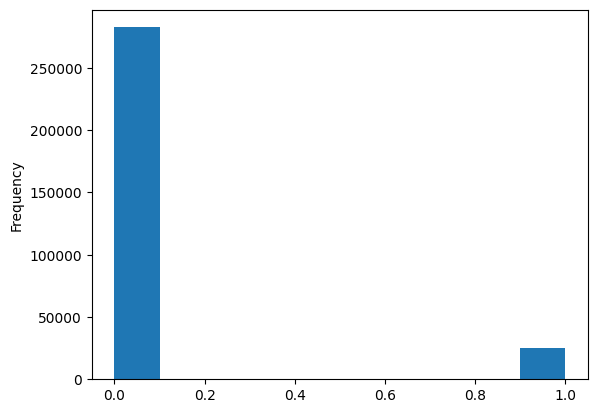

In [ ]:
# Distribution of target column
datasets["application_train"]['TARGET'].astype(int).plot.hist();

Percentage of positive target: 8.0729 %
Percentage of negative target: 91.9271 %


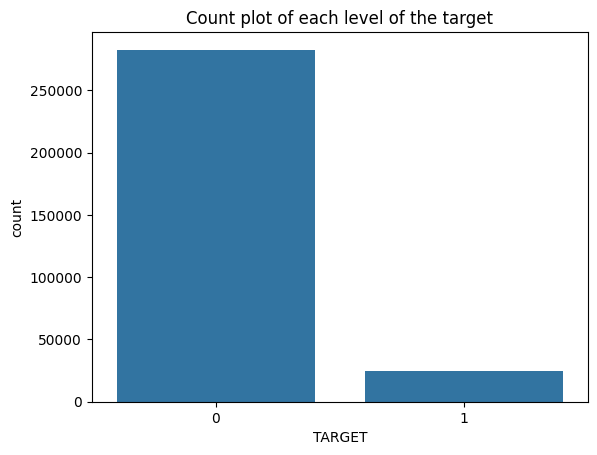

In [ ]:
# Target proportions in Application Train
sns.countplot(x = datasets["application_train"]['TARGET'])
plt.title("Count plot of each level of the target")
print("Percentage of positive target:", round((datasets["application_train"]['TARGET'].loc[datasets["application_train"]['TARGET'] == 1].shape[0] / datasets["application_train"]['TARGET'].shape[0]) * 100, 4), "%")
print("Percentage of negative target:", round((datasets["application_train"]['TARGET'].loc[datasets["application_train"]['TARGET'] == 0].shape[0] / datasets["application_train"]['TARGET'].shape[0]) * 100, 4), "%")

In [ ]:
# Correlation with target column
correlations = datasets["application_train"].select_dtypes(include=['number']).corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


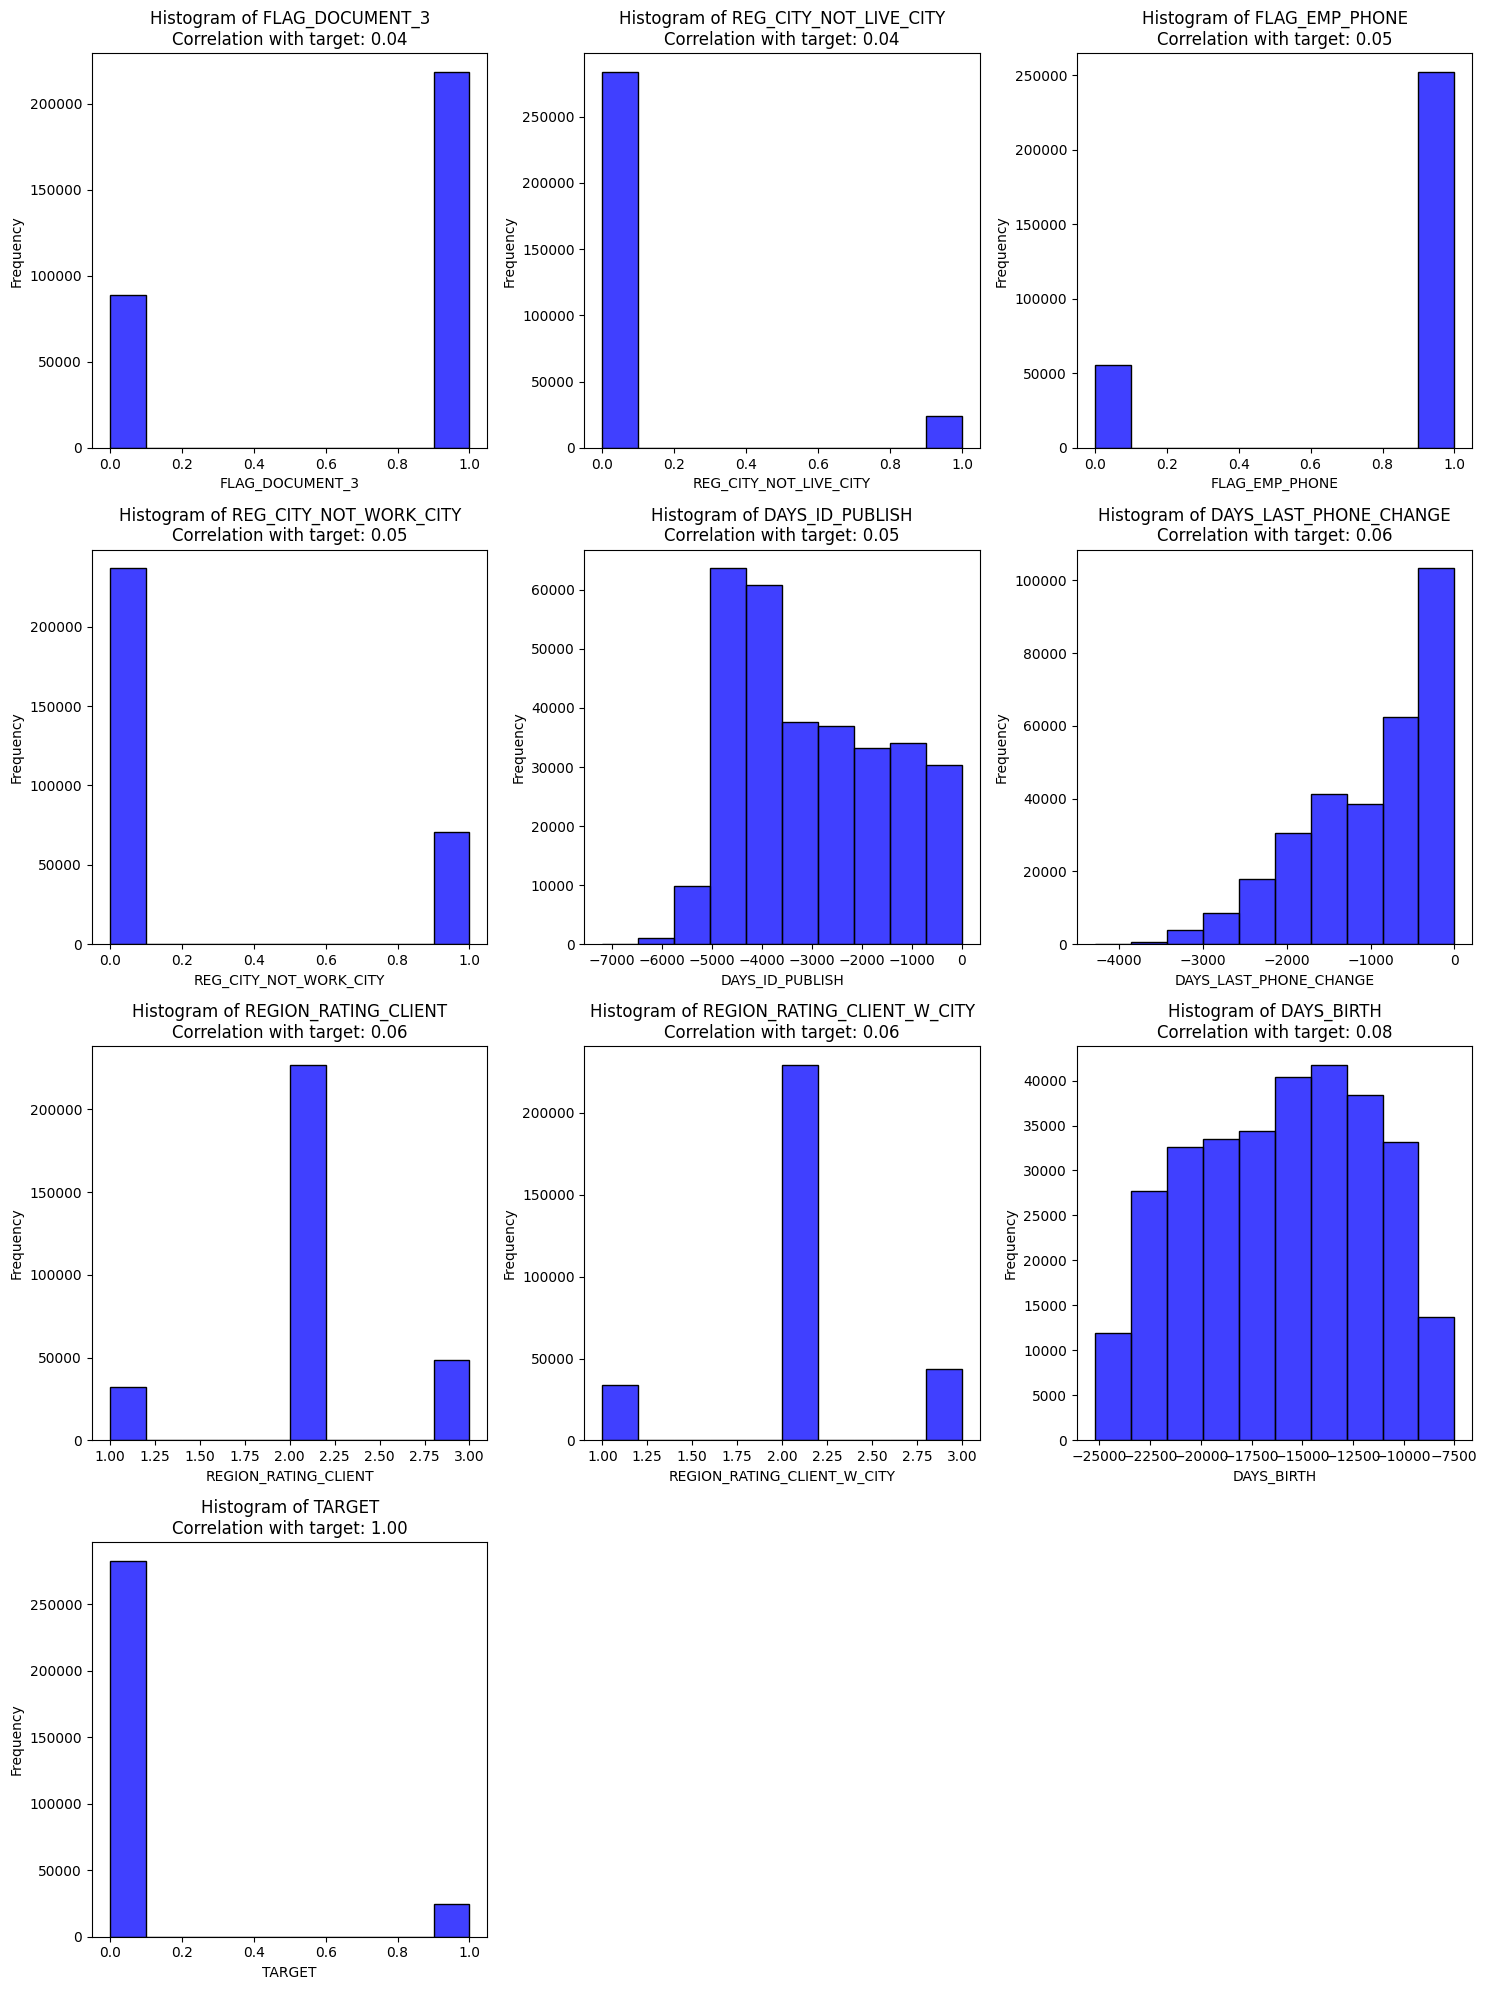

In [ ]:
top_10_positive = correlations.tail(10)

plt.figure(figsize=(15,20))

for i, feature in enumerate(top_10_positive.index):
    plt.subplot(4,3,i+1)
    sns.histplot(datasets["application_train"][feature], color='blue', bins=10)
    plt.title(f'Histogram of {feature}\nCorrelation with target: {top_10_positive[feature]:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

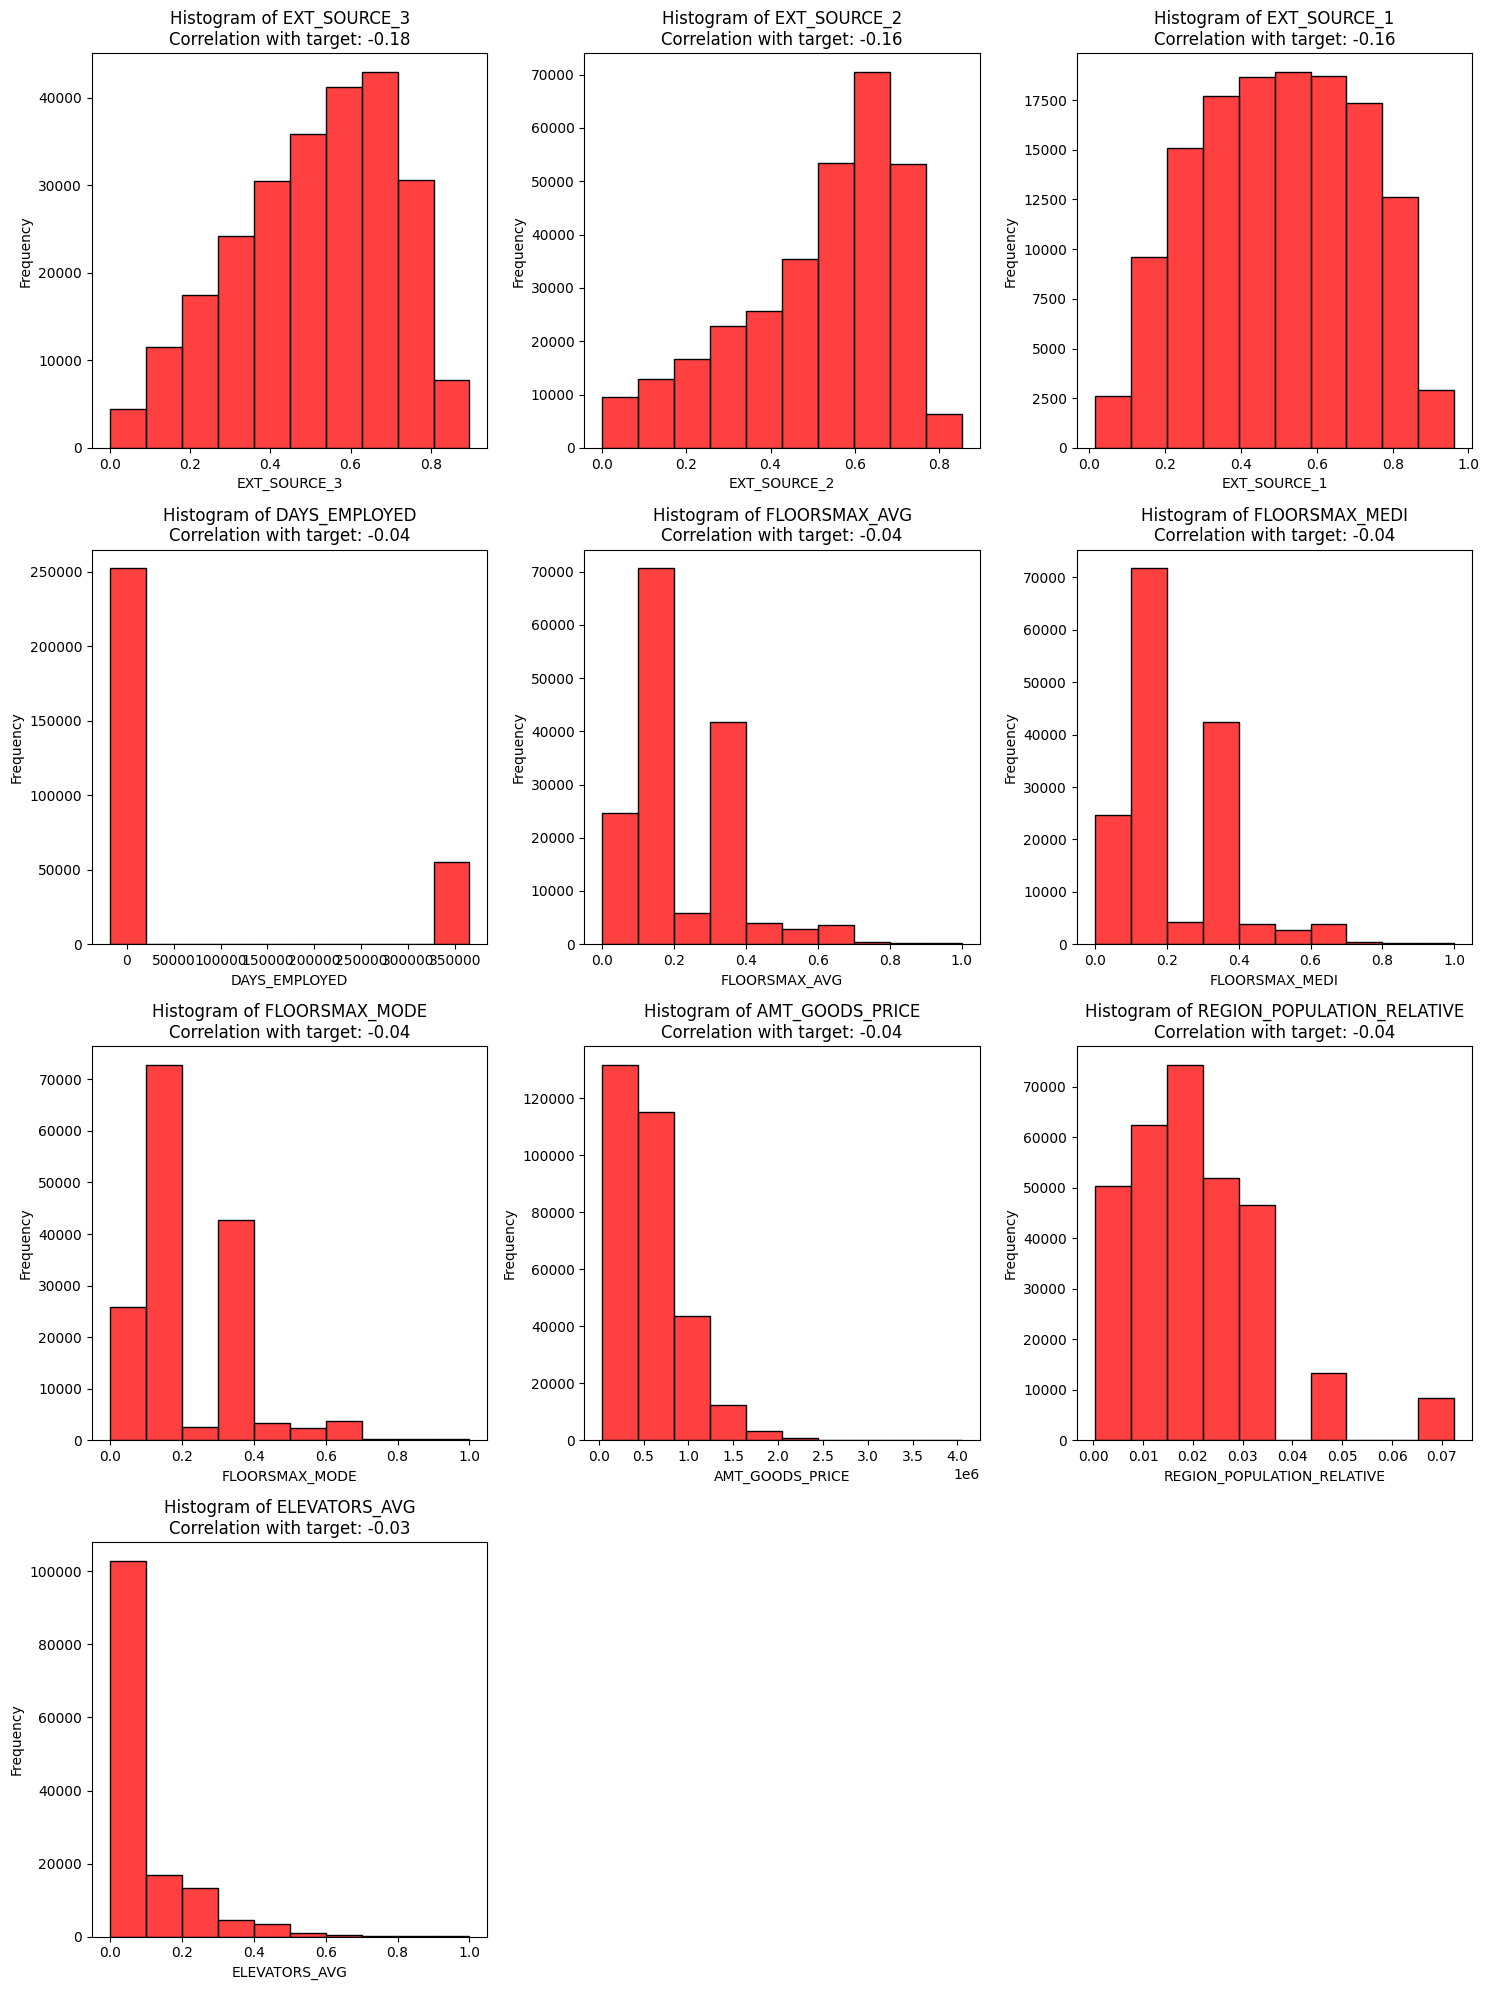

In [ ]:
top_10_negative = correlations.head(10)

plt.figure(figsize=(15,20))

for i, feature in enumerate(top_10_negative.index):
    plt.subplot(4,3,i+1)
    sns.histplot(datasets["application_train"][feature], color='red', bins=10)
    plt.title(f'Histogram of {feature}\nCorrelation with target: {top_10_negative[feature]:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

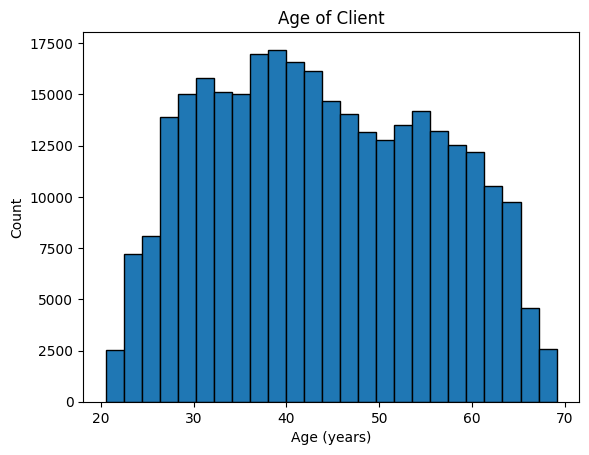

In [ ]:
# Applicants Age
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

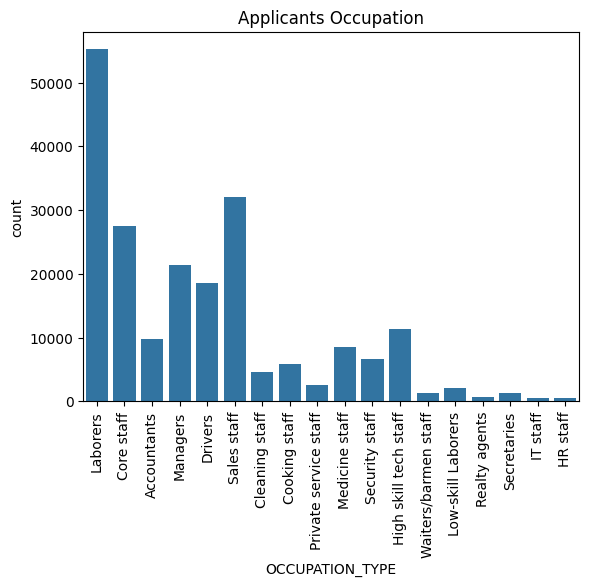

In [ ]:
# Applicants Occupation
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

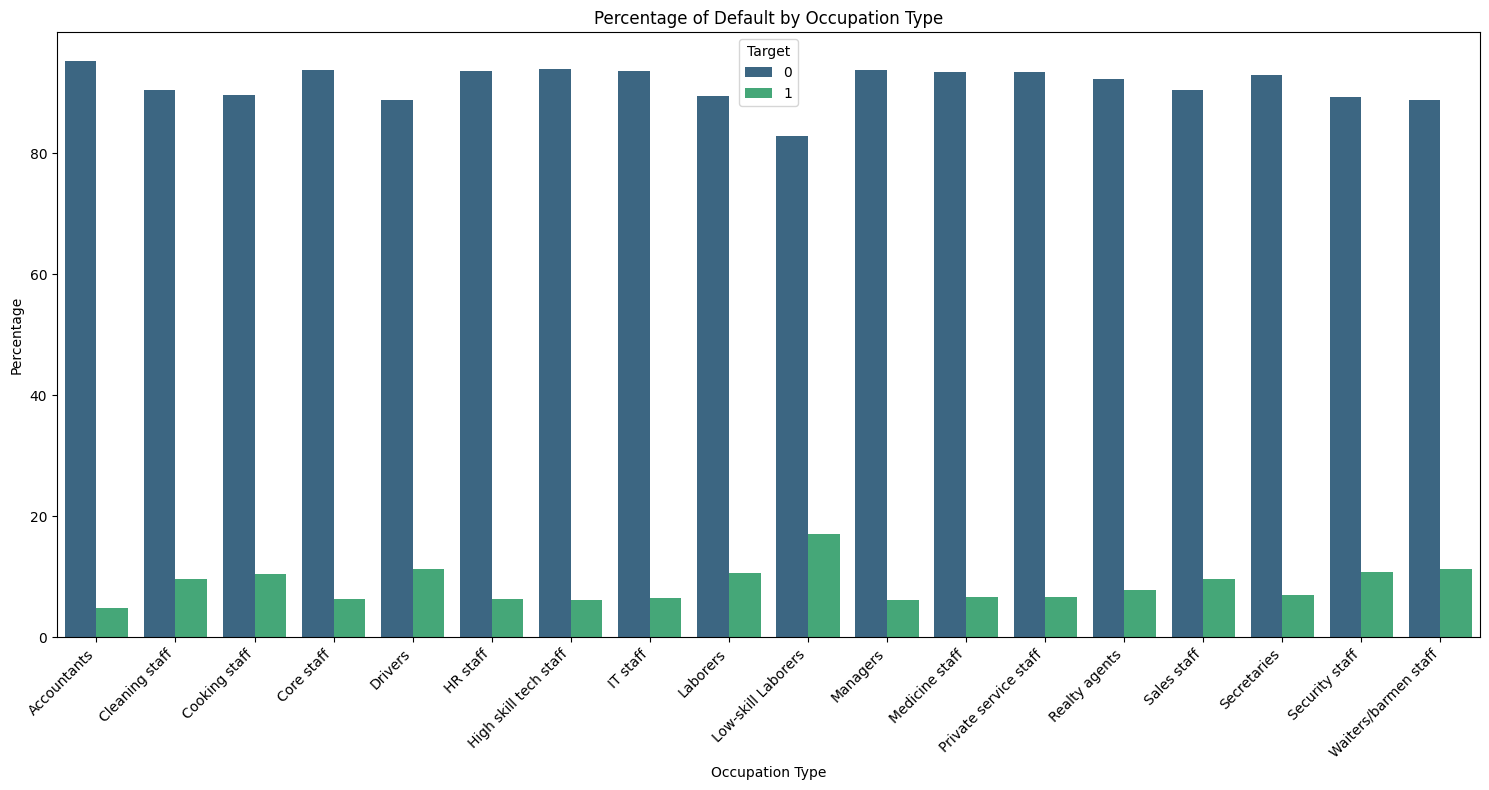

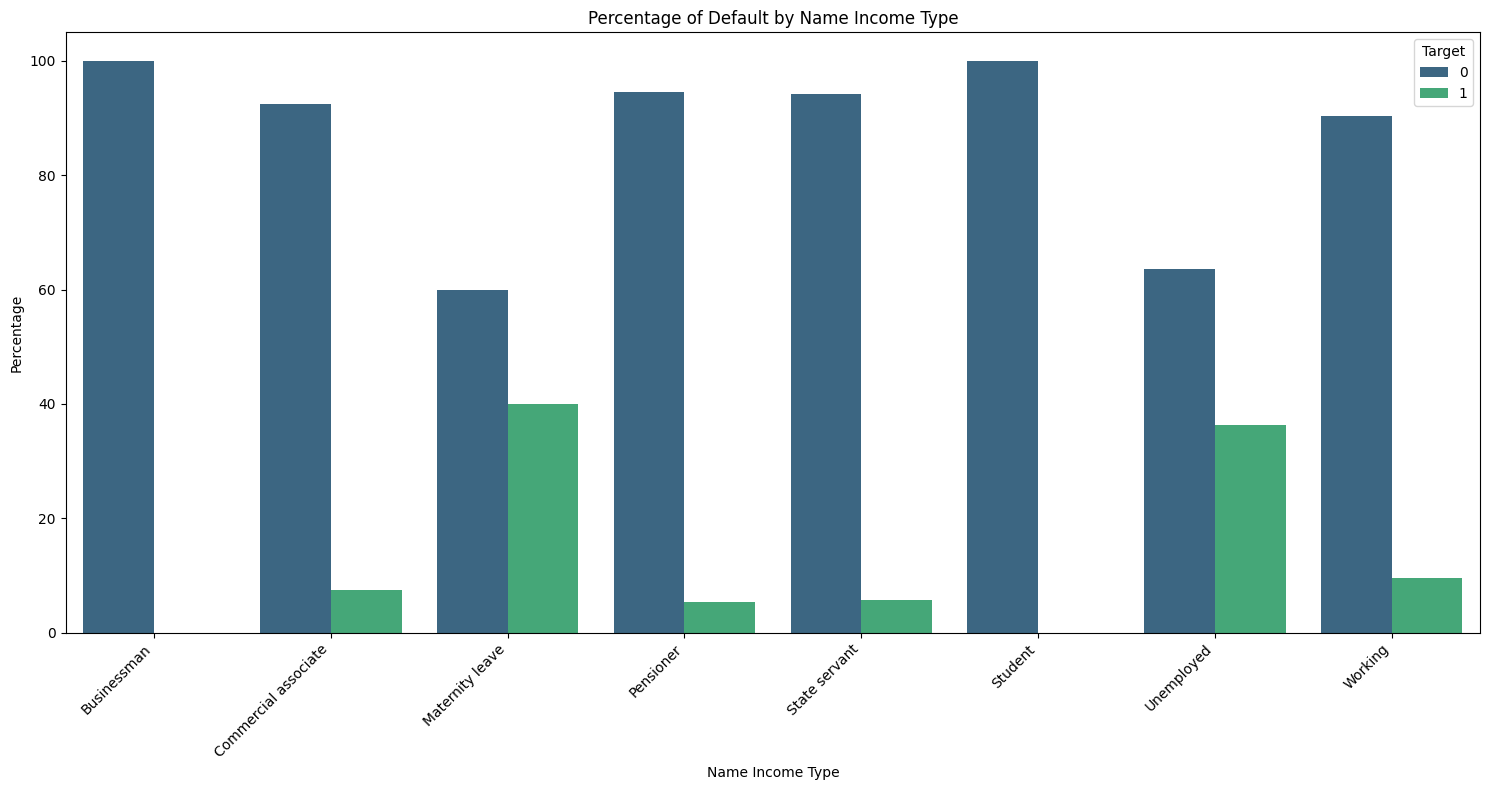

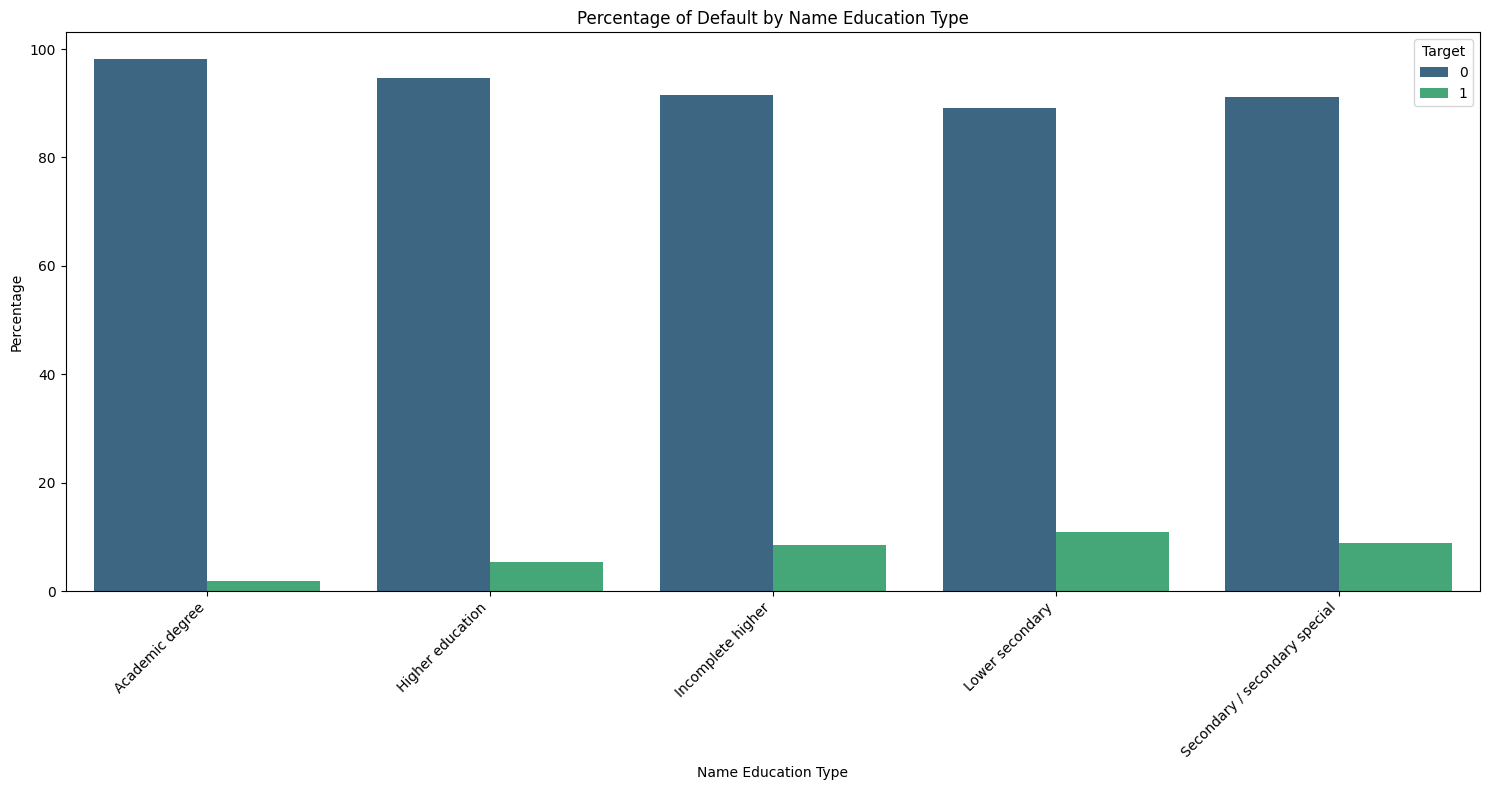

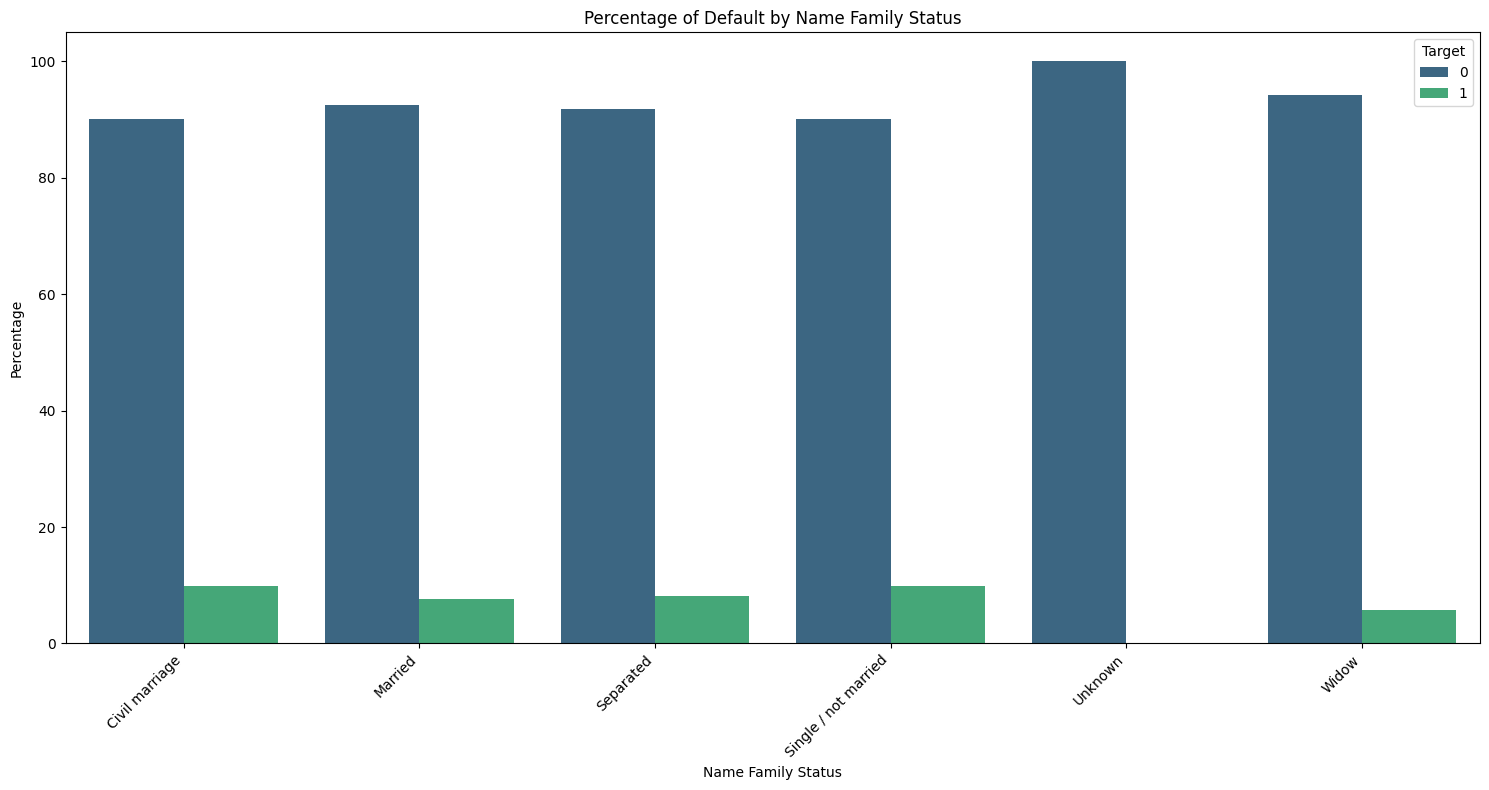

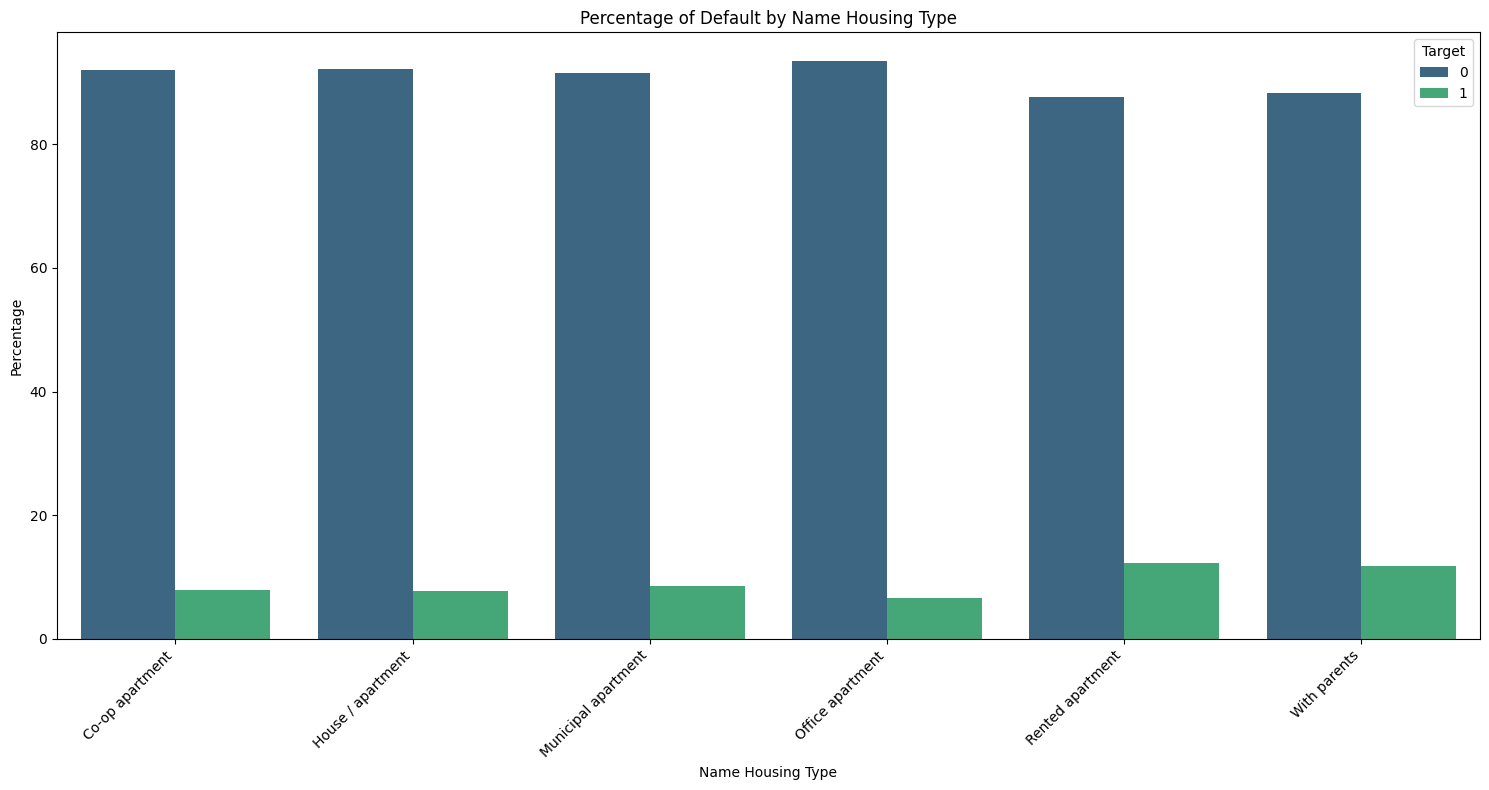

In [ ]:
# List of variables to analyze
variables = ['OCCUPATION_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Loop through variables and create plots
for var in variables:
    # Group by variable and TARGET, calculate the count
    grouped_data = datasets["application_train"].groupby([var, 'TARGET']).size().reset_index(name='count')

    # Normalize to calculate percentages
    grouped_data['percentage'] = grouped_data['count'] / grouped_data.groupby(var)['count'].transform('sum') * 100

    # Plot the percentage distribution of TARGET for each variable
    plt.figure(figsize=(15, 8))
    sns.barplot(
        data=grouped_data,
        x=var,
        y='percentage',
        hue='TARGET',
        palette="viridis"
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Percentage of Default by {var.replace('_', ' ').title()}")
    plt.ylabel("Percentage")
    plt.xlabel(var.replace('_', ' ').title())
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()


In [ ]:
# Check to see unique values for each row
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [ ]:
# is there an overlap between the test and train customers
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

## **3.3. Previous Application EDA**

The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [ ]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [ ]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [ ]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [ ]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


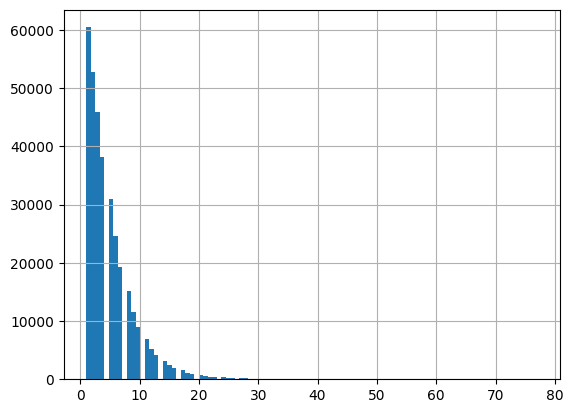

In [ ]:
# How many previous applciations  per applicant in the previous_application
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

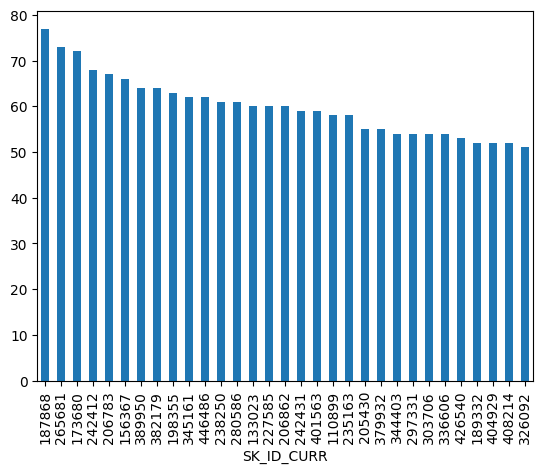

In [ ]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Histogram of Number of previous applications for an ID
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

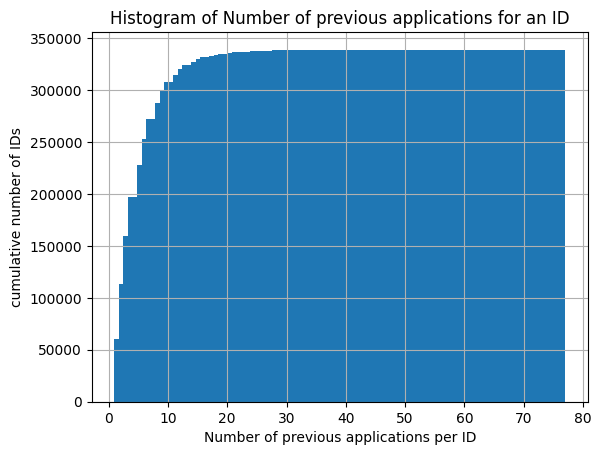

In [ ]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


**Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [ ]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


## **3.4. Bureau Table EDA**

In this section, we do EDA on the Bureau data. We analyze missing values and generate correlation heat map for the features in this secondary dataset. We also provide distrbutions of each variable.

In [ ]:
datasets['bureau'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
datasets['bureau'].describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [ ]:
datasets['bureau'].describe(include='all')

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

In [ ]:
# Missing Values
percent = (datasets['bureau'].isnull().sum()/datasets['bureau'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['bureau'].isna().sum().sort_values(ascending = False)
missing_bureau_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_bureau_data.head(25)

Percent  Missing Count
AMT_ANNUITY               71.47        1226791
AMT_CREDIT_MAX_OVERDUE    65.51        1124488
DAYS_ENDDATE_FACT         36.92         633653
AMT_CREDIT_SUM_LIMIT      34.48         591780
AMT_CREDIT_SUM_DEBT       15.01         257669
DAYS_CREDIT_ENDDATE        6.15         105553
AMT_CREDIT_SUM             0.00             13
CREDIT_ACTIVE              0.00              0
CREDIT_CURRENCY            0.00              0
DAYS_CREDIT                0.00              0
CREDIT_DAY_OVERDUE         0.00              0
SK_ID_BUREAU               0.00              0
CNT_CREDIT_PROLONG         0.00              0
AMT_CREDIT_SUM_OVERDUE     0.00              0
CREDIT_TYPE                0.00              0
DAYS_CREDIT_UPDATE         0.00              0
SK_ID_CURR                 0.00              0

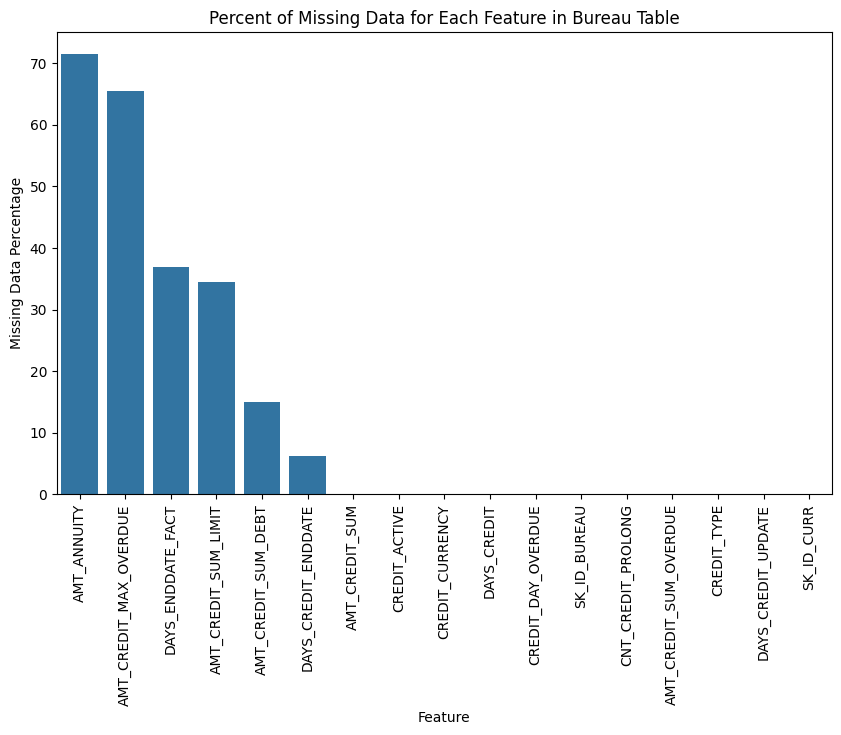

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_bureau_data.index, y=missing_bureau_data['Percent'])
plt.xticks(rotation=90)
plt.title('Percent of Missing Data for Each Feature in Bureau Table')
plt.xlabel('Feature')
plt.ylabel('Missing Data Percentage')
plt.show()

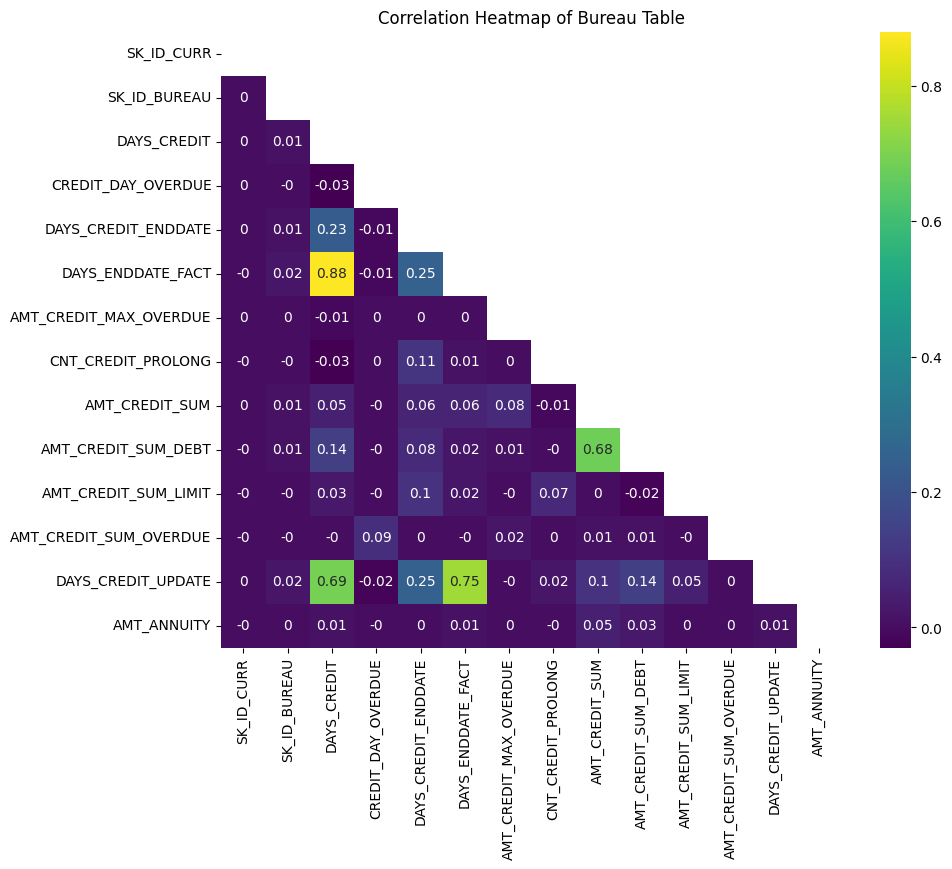

In [ ]:
# Correlations
bureau_numeric = datasets['bureau'].select_dtypes(include=['number'])
bureau_corr = bureau_numeric.corr().round(2)
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(bureau_corr, dtype=bool))
sns.heatmap(bureau_corr, annot=True, cmap='viridis', mask=mask)
plt.title('Correlation Heatmap of Bureau Table')
plt.show()

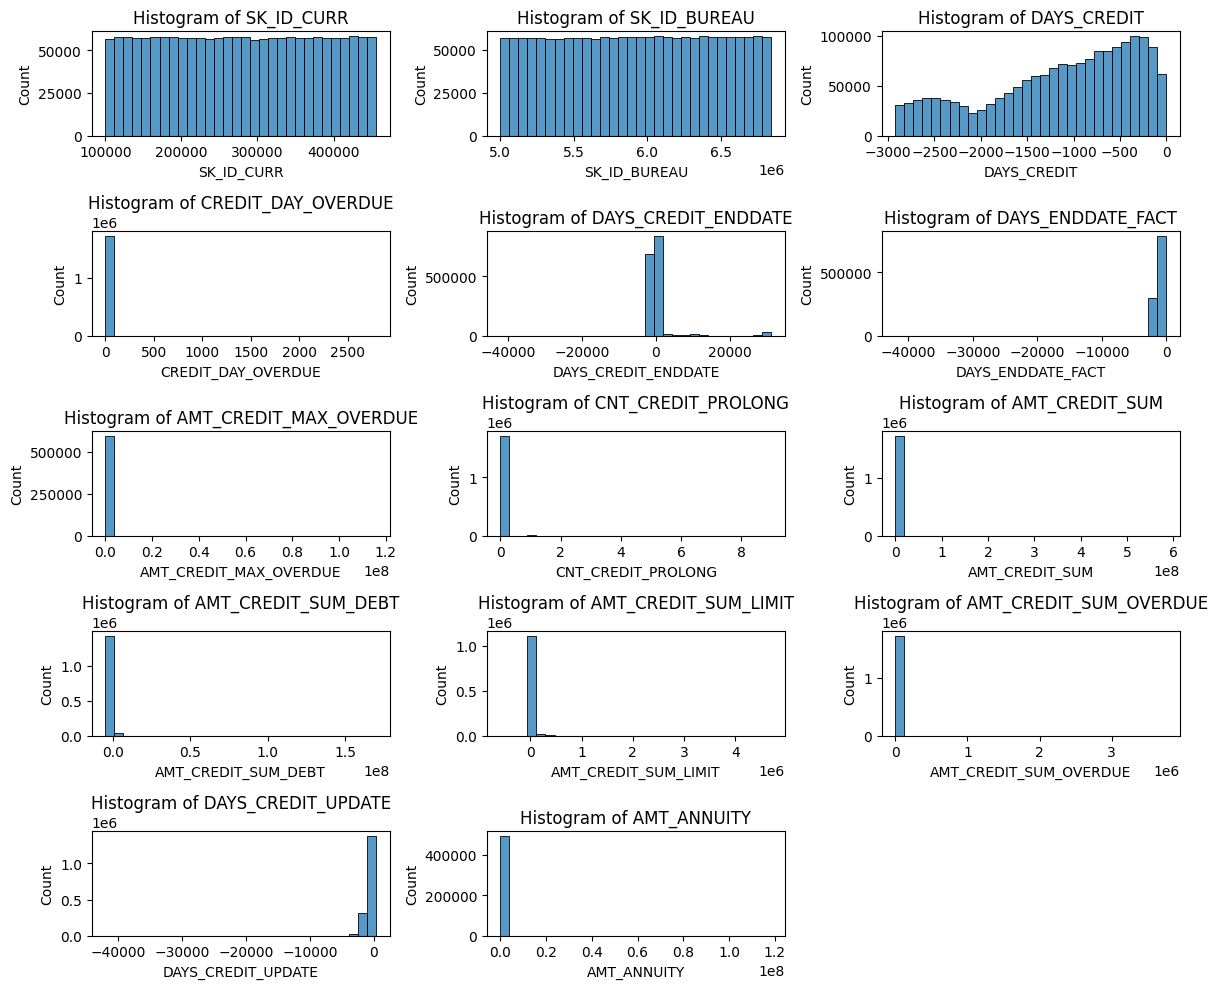

In [ ]:
bureau = datasets['bureau']
num_cols = bureau.select_dtypes(include=['number']).columns

plt.figure(figsize=(12,10))
for i, col in enumerate(num_cols, 1):
  plt.subplot(len(num_cols)// 3+1, 3, i)
  sns.histplot(bureau[col], bins=30)
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [ ]:
bureau = datasets['bureau']
unique_bureau_ids = bureau['SK_ID_CURR'].nunique()

print(f'There are {unique_bureau_ids} unique IDs in the bureau table')

There are 305811 unique IDs in the bureau table


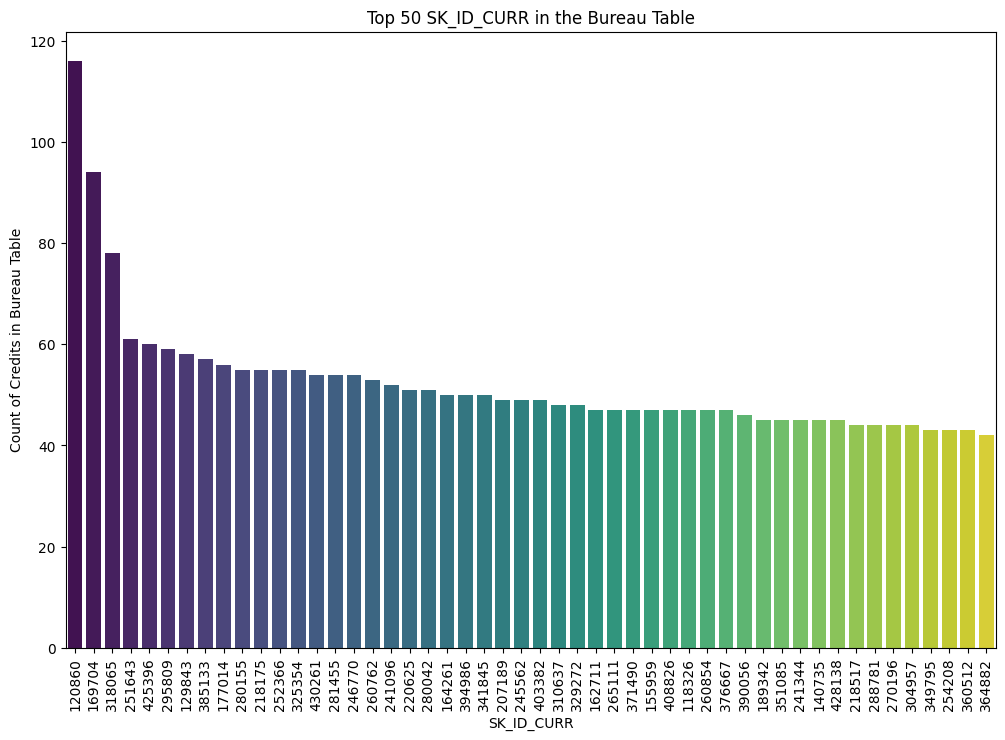

In [ ]:
bureau = datasets['bureau']
counts_bureau_ids = bureau['SK_ID_CURR'].value_counts().head(50)
plt.figure(figsize=(12, 8))
sns.barplot(x=counts_bureau_ids.index.astype(str), y=counts_bureau_ids.values, palette='viridis')
plt.xlabel('SK_ID_CURR')
plt.ylabel('Count of Credits in Bureau Table')
plt.title('Top 50 SK_ID_CURR in the Bureau Table')
plt.xticks(rotation=90)
plt.show()

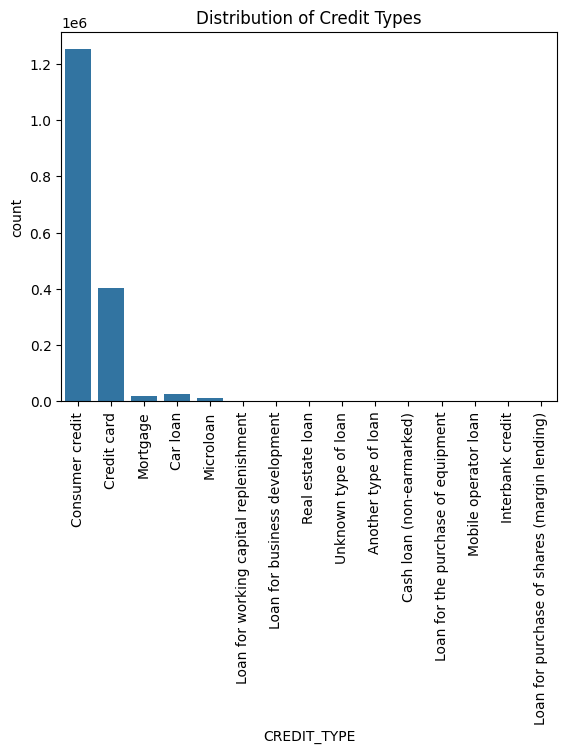

In [ ]:
# Distribution of Credit Types
sns.countplot(data=bureau, x='CREDIT_TYPE')
plt.title('Distribution of Credit Types')
plt.xticks(rotation=90)
plt.show()

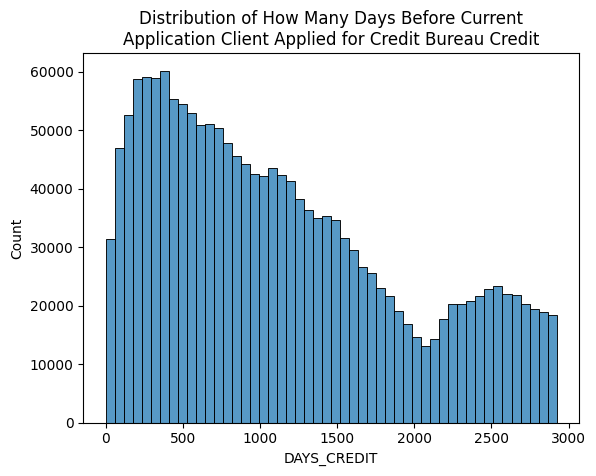

In [ ]:
# Distribution of How Many Days Before Current Application Client Applied for Credit Bureau Credit
sns.histplot(bureau['DAYS_CREDIT'].abs(), bins=50)
plt.title('Distribution of How Many Days Before Current\nApplication Client Applied for Credit Bureau Credit')
plt.show()

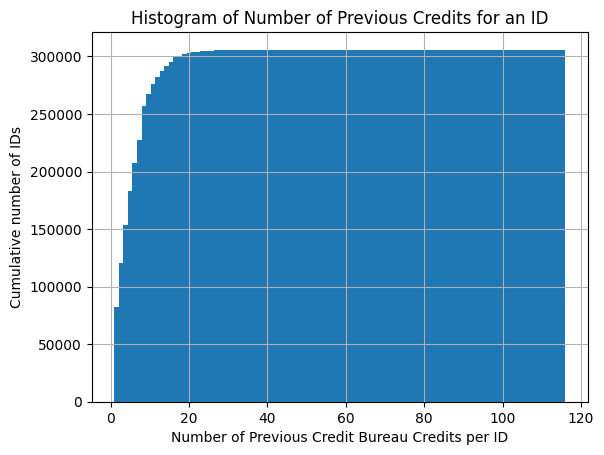

In [ ]:
# Histogram of Number of Previous Credits for an ID
plt.hist(bureau['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('Cumulative number of IDs')
plt.xlabel('Number of Previous Credit Bureau Credits per ID')
plt.title('Histogram of Number of Previous Credits for an ID')
plt.show()

## **3.5 Bureau Balance Table EDA**

Here we look at missing values in the Bureau Balance data and thhe distribution of Credit Status.

In [ ]:
datasets['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
datasets['bureau_balance'].describe(include='all')

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   2.729992e+07    2.729992e+07  27299925
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN  13646993
mean    6.036297e+06   -3.074169e+01       NaN
std     4.923489e+05    2.386451e+01       NaN
min     5.001709e+06   -9.600000e+01       NaN
25%     5.730933e+06   -4.600000e+01       NaN
50%     6.070821e+06   -2.500000e+01       NaN
75%     6.431951e+06   -1.100000e+01       NaN
max     6.842888e+06    0.000000e+00       NaN

In [ ]:
# Missing Values
percent = (datasets['bureau_balance'].isnull().sum()/datasets['bureau_balance'].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets['bureau_balance'].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_application_train_data.head(25)

Percent  Missing Count
SK_ID_BUREAU        0.0              0
MONTHS_BALANCE      0.0              0
STATUS              0.0              0

In [ ]:
bureau_balance = datasets['bureau_balance']
unique_bureau_balance_ids = bureau_balance['SK_ID_BUREAU'].nunique()

print(f'There are {unique_bureau_balance_ids} unique IDs in the bureau_balance table')

There are 817395 unique IDs in the bureau_balance table


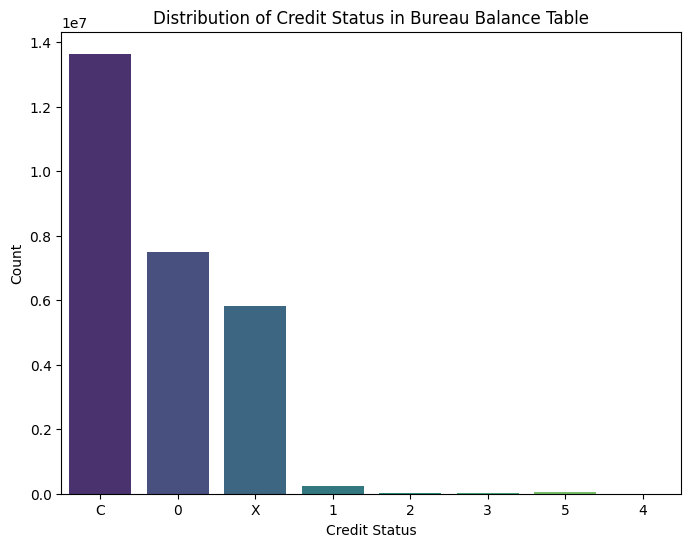

In [ ]:
# Distribution of Credit Status in Bureau Balance Table
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS', data=bureau_balance, palette='viridis')

plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.title('Distribution of Credit Status in Bureau Balance Table')

plt.show()

## **3.6 Credit Card Balance Data**

In this section, we do some visal EDA on the Credit Card Balance table, and define some new meaningful features like credit utility ratio, payment draw ratio, etc. We also categorize applicants based on their credit card history (short/med/long) using the fact that each row corresponds to one month of credit data. We also look at the distributions of the variables and drop highly correlated or redundant featues.

In [ ]:
ccb = datasets['credit_card_balance']
ccb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
datasets["credit_card_balance"].describe() #numerical only features

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968805e+03             3.540204e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596588e+04   5.808881e+04          5.809829e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              3.090496e+06          3.840312e+06   
mean               3.094490e-01          7.031439e-01   
std                1.100401e+00          3.190347e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std                  8.263861e-02              3.240649e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.200000e+01              1.650000e+02   

       CNT_INST

In [ ]:
datasets["credit_card_balance"].describe(include='all') #look at all categorical and numerical

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std     5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%     1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%     1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%     2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              3.840312e+06              3.090496e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.538080e+05              5.961325e+03   
std                1.651457e+05              2.822569e+04   
min                0.000000e+00             -6.827310e+03   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              2.115000e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           3.840312e+06                3.090496e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.433388e+03                2.881696e+02   
std             3.384608e+04                8.201989e+03   
min            -6.211620e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.529847e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  \
count               3.090496e+06             3.535076e+06  ...   3.840312e+06   
unique                       NaN                      NaN  ...            NaN   
top                          NaN                      NaN  ...            NaN   
freq                         NaN                      NaN  ...            NaN   
mean                2.968805e+03             3.540204e+03  ...   5.808881e+04   
std                 2.079689e+04             5.600154e+03  ...   1.059654e+05   
min                 0.000000e+00             0.000000e+00  ...  -4.202502e+05   
25%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
50%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
75%                 0.000000e+00             6.633911e+03  ...   8.889949e+04   
max                 2.239274e+06             2.028820e+05  ...   1.493338e+06   

        AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count           3.840312e+06              3.090496e+06          3.840312e+06   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean            5.809829e+04              3.094490e-01          7.031439e-01   
std             1.059718e+05              1.100401e+00          3.190347e+00   
min            -4.202502e+05              0.000000e+00          0.000000e+00   
25%             0.000000e+00              0.000000e+00          0.000000e+00   
50%             0.000000e+00              0.00

In [ ]:
# Missing Data
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_credit_card_balance_data.head(20)

Percent  Missing Count
AMT_PAYMENT_CURRENT           20.00         767988
AMT_DRAWINGS_ATM_CURRENT      19.52         749816
CNT_DRAWINGS_POS_CURRENT      19.52         749816
AMT_DRAWINGS_OTHER_CURRENT    19.52         749816
AMT_DRAWINGS_POS_CURRENT      19.52         749816
CNT_DRAWINGS_OTHER_CURRENT    19.52         749816
CNT_DRAWINGS_ATM_CURRENT      19.52         749816
CNT_INSTALMENT_MATURE_CUM      7.95         305236
AMT_INST_MIN_REGULARITY        7.95         305236
SK_ID_PREV                     0.00              0
AMT_TOTAL_RECEIVABLE           0.00              0
SK_DPD                         0.00              0
NAME_CONTRACT_STATUS           0.00              0
CNT_DRAWINGS_CURRENT           0.00              0
AMT_PAYMENT_TOTAL_CURRENT      0.00              0
AMT_RECIVABLE                  0.00              0
AMT_RECEIVABLE_PRINCIPAL       0.00              0
SK_ID_CURR                     0.00              0
AMT_DRAWINGS_CURRENT           0.00              0
AMT_CREDIT_LIMIT_ACTUAL        0.00              0

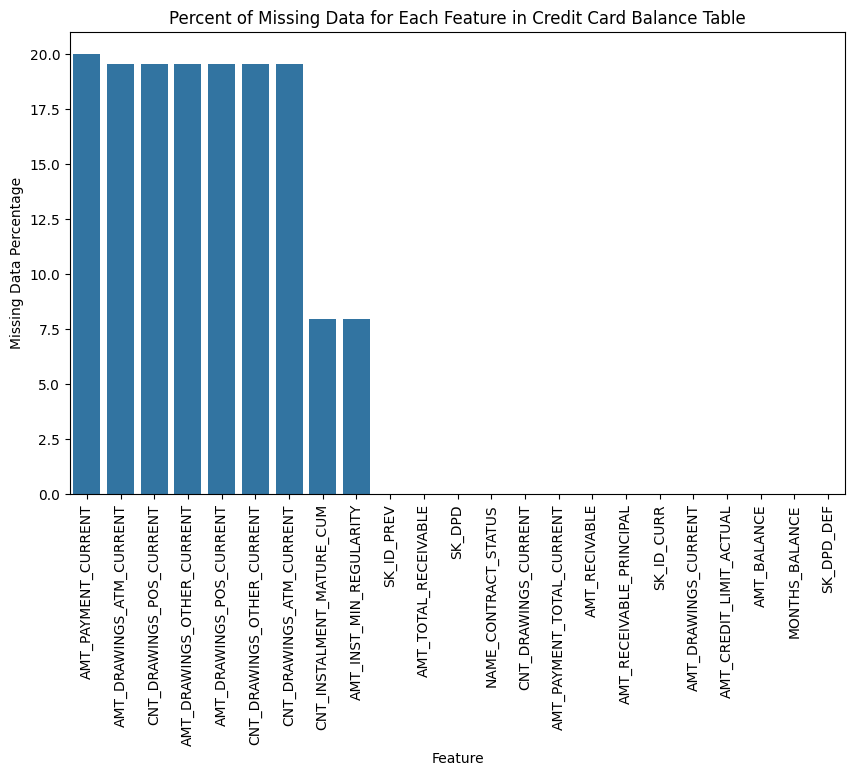

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_credit_card_balance_data.index, y=missing_credit_card_balance_data['Percent'])
plt.xticks(rotation=90)
plt.title('Percent of Missing Data for Each Feature in Credit Card Balance Table')
plt.xlabel('Feature')
plt.ylabel('Missing Data Percentage')
plt.show()

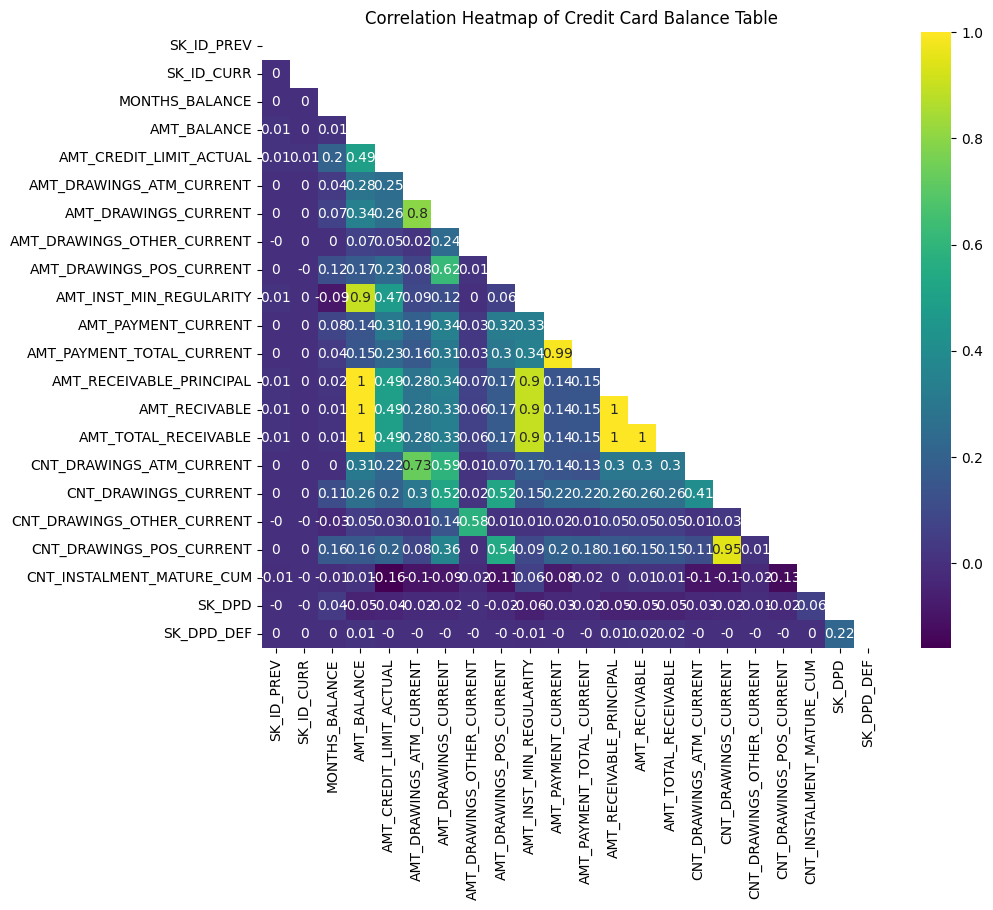

In [ ]:
# Correlations
credit_card_balance_numeric = datasets['credit_card_balance'].select_dtypes(include=['number'])
credit_card_balance_corr = credit_card_balance_numeric.corr().round(2)
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(credit_card_balance_corr, dtype=bool))
sns.heatmap(credit_card_balance_corr, annot=True, cmap='viridis', mask=mask)
plt.title('Correlation Heatmap of Credit Card Balance Table')
plt.show()

In [ ]:
ccb = datasets['credit_card_balance']
unique_ccb_ids = ccb['SK_ID_CURR'].nunique()

print(f'There are {unique_ccb_ids} unique IDs in the credit_card_balance table')

There are 103558 unique IDs in the credit_card_balance table


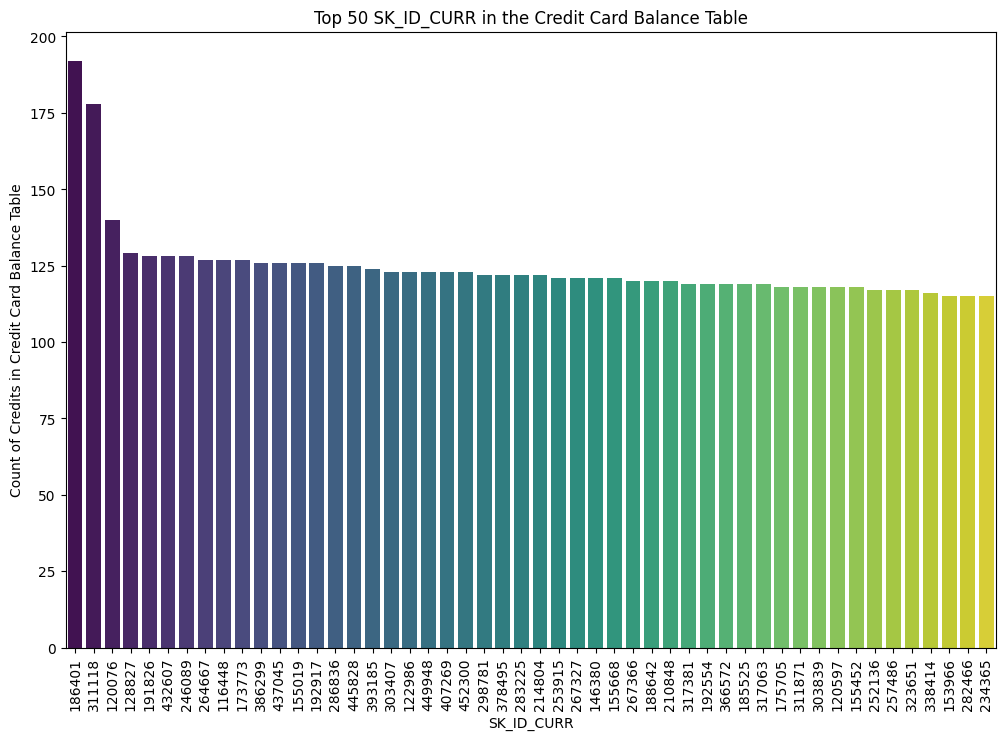

In [ ]:
ccb = datasets['credit_card_balance']
counts_ccb_ids = ccb['SK_ID_CURR'].value_counts().head(50)
plt.figure(figsize=(12, 8))
sns.barplot(x=counts_ccb_ids.index.astype(str), y=counts_ccb_ids.values, palette='viridis')
plt.xlabel('SK_ID_CURR')
plt.ylabel('Count of Credits in Credit Card Balance Table')
plt.title('Top 50 SK_ID_CURR in the Credit Card Balance Table')
plt.xticks(rotation=90)
plt.show()

Compare the above table with the correspodning table for Bureau

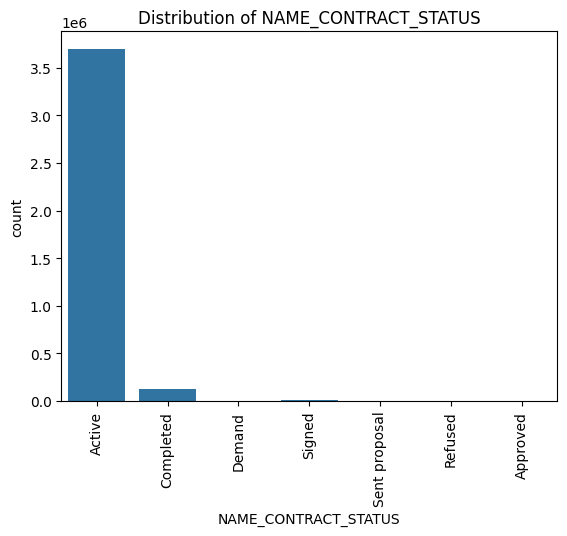

In [ ]:
# Distribution of NAME_CONTRACT_STATUS
sns.countplot(data=ccb, x='NAME_CONTRACT_STATUS')
plt.title('Distribution of NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# High correlation pairs to potentially drop

threshold = 0.75

upper_triangle = credit_card_balance_corr.abs().where(np.triu(np.ones(credit_card_balance_corr.shape), k=1).astype(bool))

# Columns with high correlation
high_corr_pairs = [(col1, col2, upper_triangle.loc[col1, col2])
                   for col1 in upper_triangle.columns
                   for col2 in upper_triangle.columns
                   if upper_triangle.loc[col1, col2] > threshold]


high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs:
('AMT_BALANCE', 'AMT_RECEIVABLE_PRINCIPAL', 1.0)
('AMT_BALANCE', 'AMT_RECIVABLE', 1.0)
('AMT_BALANCE', 'AMT_TOTAL_RECEIVABLE', 1.0)
('AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 1.0)
('AMT_RECEIVABLE_PRINCIPAL', 'AMT_TOTAL_RECEIVABLE', 1.0)
('AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 1.0)
('AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 0.99)
('CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 0.95)
('AMT_BALANCE', 'AMT_INST_MIN_REGULARITY', 0.9)
('AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 0.9)
('AMT_INST_MIN_REGULARITY', 'AMT_RECIVABLE', 0.9)
('AMT_INST_MIN_REGULARITY', 'AMT_TOTAL_RECEIVABLE', 0.9)
('AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 0.8)


Based on the above correlations and also the column descriptions from 'HomeCredit_columns_description.csv', we may drop the following columns:

* __AMT_RECIVABLE:__ Amount receivable on the previous credit
* __AMT_TOTAL_RECEIVABLE:__ Total amount receivable on the previous credit
* __AMT_RECEIVABLE_PRINCIPAL:__ Amount receivable for principal on the previous credit
* __AMT_PAYMENT_CURRENT:__ How much did the client pay during the month on the previous credit
* __CNT_DRAWINGS_POS_CURRENT:__ Number of drawings for goods during this month on the previous credit
* __AMT_INST_MIN_REGULARITY:__ Minimal installment for this month of the previous credit
* __AMT_DRAWINGS_ATM_CURRENT:__ Amount drawing at ATM during the month of the previous credit

In [ ]:
# Test Dropping redundant columns

columns_to_drop = ['SK_ID_PREV', # since it is just the previous ID, same task can be done using current ID, i.e. SK_ID_CURR
                   'AMT_RECIVABLE',
                   'AMT_TOTAL_RECEIVABLE',
                   'AMT_RECEIVABLE_PRINCIPAL',
                   'AMT_PAYMENT_CURRENT',
                   'CNT_DRAWINGS_POS_CURRENT',
                   'AMT_INST_MIN_REGULARITY',
                   'AMT_DRAWINGS_ATM_CURRENT']

ccb_reduced = ccb.drop(columns_to_drop, axis=1)

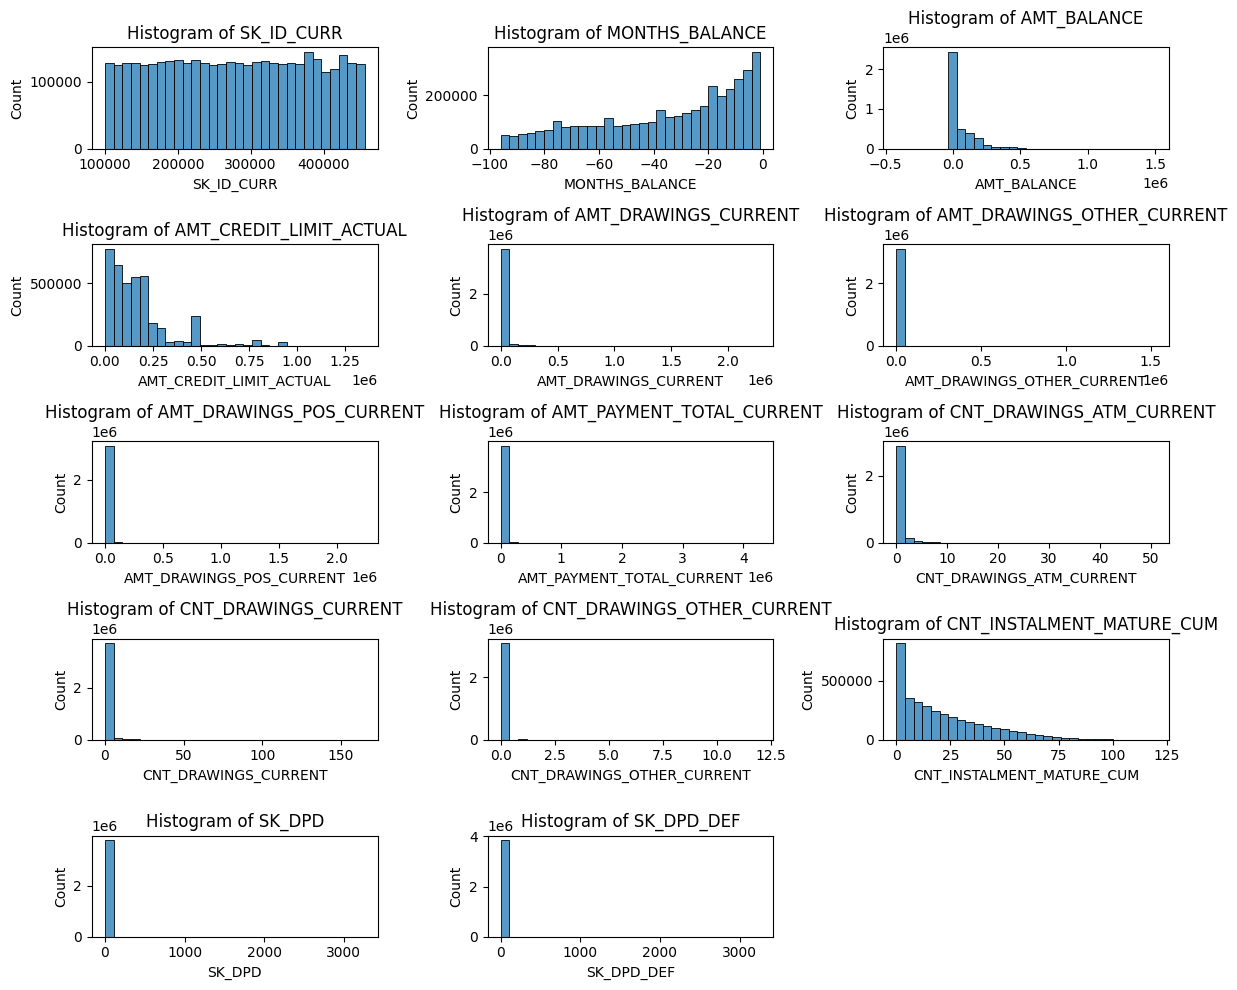

In [ ]:
num_cols = ccb_reduced.select_dtypes(include=['number']).columns

plt.figure(figsize=(12,10))
for i, col in enumerate(num_cols, 1):
  plt.subplot(len(num_cols)// 3+1, 3, i)
  sns.histplot(ccb_reduced[col], bins=30)
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Categorizing applicants based on their credit card history

applicants_all = ccb_reduced['SK_ID_CURR'].nunique()
applicants_below12 =  ccb_reduced['SK_ID_CURR'].value_counts()<12
applicants_12to36 = (ccb_reduced['SK_ID_CURR'].value_counts() >= 12) & (ccb_reduced['SK_ID_CURR'].value_counts() <= 36)
applicants_36plus =  ccb_reduced['SK_ID_CURR'].value_counts()>36
print('Applicants with less than 1 year of credit card history in Home Credit:', np.round(100*(sum(applicants_below12)/applicants_all),2), '%')
print('Applicants with 1 to 3 years of credit card history in Home Credit:', np.round(100*(sum(applicants_12to36)/applicants_all),2), '%')
print('Applicants with more than 3 years of credit card history in Home Credit:', np.round(100*(sum(applicants_36plus)/applicants_all),2), '%')

Applicants with less than 1 year of credit card history in Home Credit: 29.71 %
Applicants with 1 to 3 years of credit card history in Home Credit: 35.24 %
Applicants with more than 3 years of credit card history in Home Credit: 35.05 %


Based on how many months of credit card history an applicant has with Home Credit, we may define a new categorical feature 'CREDIT_CARD_HISTORY' that categorizes an applicant as SHORT, MED or LONG.

In [ ]:
# Feature Engineering for Credit Card Balance Data

# Categorize credit card history
ccb_history_months = ccb_reduced['SK_ID_CURR'].value_counts()

# Step 2: Define a function to categorize the credit card history
def categorize_history(months):
    if months < 12:
        return 'SHORT (< 1 YEAR)'
    elif 12 <= months <= 36:
        return 'MED (1-3 YEARS)'
    else:
        return 'LONG (>3 YEARS)'

# Step 3: Map the counts to the categories
ccb_reduced['CREDIT_CARD_HISTORY'] = ccb_reduced['SK_ID_CURR'].map(ccb_history_months).apply(categorize_history)

# Verify the new feature
print(ccb_reduced[['SK_ID_CURR', 'CREDIT_CARD_HISTORY']].head())

   SK_ID_CURR CREDIT_CARD_HISTORY
0      378907     LONG (>3 YEARS)
1      363914     LONG (>3 YEARS)
2      371185     LONG (>3 YEARS)
3      337855     MED (1-3 YEARS)
4      126868     LONG (>3 YEARS)


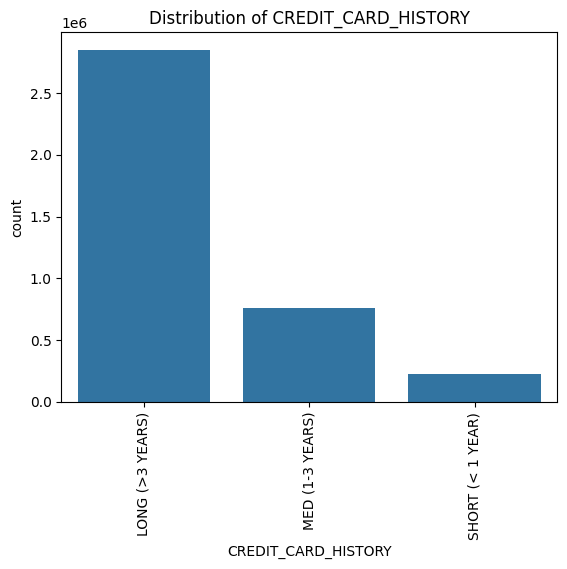

In [ ]:
sns.countplot(data=ccb_reduced, x='CREDIT_CARD_HISTORY')
plt.title('Distribution of CREDIT_CARD_HISTORY')
plt.xticks(rotation=90)
plt.show()

Following are some useful features that can be engineered from the columns of credit_card_balance.csv:

- **Credit Utilization Ratio (CREDIT_UTIL_RATIO):** Calculate credit utilization by dividing AMT_BALANCE by AMT_CREDIT_LIMIT_ACTUAL.

$$\text{CREDIT_UTIL_RATIO} = \frac{\text{AMT_BALANCE}}{\text{AMT_CREDIT_LIMIT_ACTUAL}}$$

- **Payment-to-Drawing Ratio (PAYMENT_DRAW_RATIO):** How much of the drawn amount was paid off.

$$\text{PAYMENT_DRAW_RATIO} = \frac{\text{AMT_PAYMENT_TOTAL_CURRENT}}{\text{AMT_DRAWINGS_CURRENT}}$$

- **Total Drawing Amount (AMT_DRAWINGS_TOTAL):** Combining AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT andd AMT_DRAWINGS_POS_CURRENT as the total drawing amount during the month may be more meaningful than distinguishing between specific types.

$$\text{AMT_DRAWINGS_TOTAL} = \text{AMT_DRAWINGS_CURRENT} + \text{AMT_DRAWINGS_OTHER_CURRENT} + \text{AMT_DRAWINGS_POS_CURRENT}$$

- **Total Cash Drawing Frequency (CNT_DRAWINGS_TOTAL):** Combining CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_ATM_CURRENT and CNT_DRAWINGS_OTHER_CURRENT could reflect overall frequency of cash drawings more effectively.

$$\text{CNT_DRAWINGS_TOTAL} = \text{CNT_DRAWINGS_CURRENT} + \text{CNT_DRAWINGS_ATM_CURRENT} + \text{CNT_DRAWINGS_OTHER_CURRENT}$$

- **Maxmimum Days Past Due (DPD_MAX):** Taking the maximum of SK_DPD and SK_DPD_DEF could capture overdue risk while simplifying the features.

$$\text{DPD_MAX} = \max(\text{SK_DPD},\text{SK_DPD_DEF})$$



## 3.7 Installments Payments Table EDA

In this section, we provide a descriptive and visual EDA of the Installments Payments data. We give distributions of relevant features as well as some pairwise scatterplots. We also look at missing values and the correlation plot.

Finally, we explore potential new features that can be engineered from this data, namely `payment_delay_days`, `amt_payment_difference` and `payment_to_installment_ratio`.


In [ ]:
installments_payments = datasets["installments_payments"]
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [ ]:
installments_payments.shape

(13605401, 8)

In [ ]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
installments_payments.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [ ]:
## Missing data for installments_payments
percent_ip = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing_ip = installments_payments.isna().sum().sort_values(ascending = False)
missing_ip = pd.concat([percent_ip, sum_missing_ip], axis=1, keys=['Percent', "Missing Count"])
missing_ip.head(20)

Percent  Missing Count
DAYS_ENTRY_PAYMENT         0.02           2905
AMT_PAYMENT                0.02           2905
SK_ID_PREV                 0.00              0
SK_ID_CURR                 0.00              0
NUM_INSTALMENT_VERSION     0.00              0
NUM_INSTALMENT_NUMBER      0.00              0
DAYS_INSTALMENT            0.00              0
AMT_INSTALMENT             0.00              0

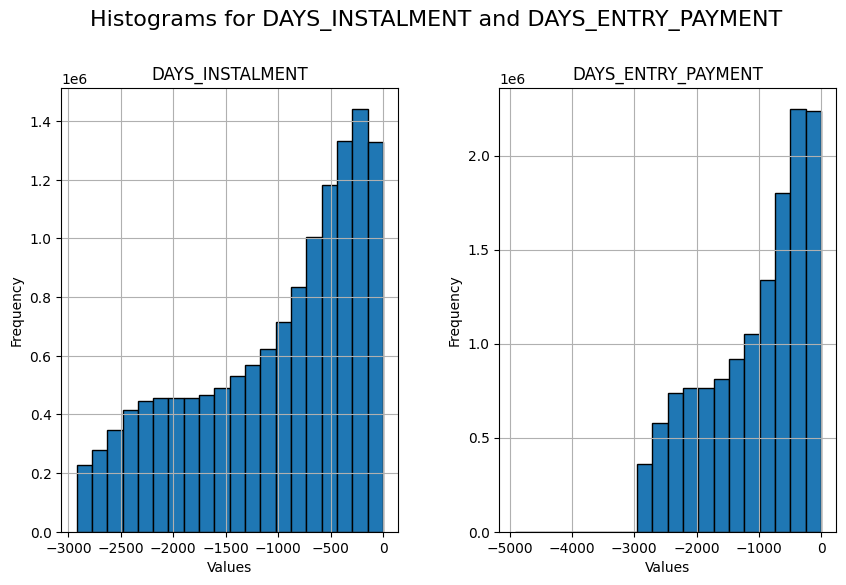

In [ ]:
# Create a histogram for DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT
installments_payments[["DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT"]].hist(bins=20, figsize=(10, 6), layout=(1, 2), edgecolor="black")

# Add titles and labels for clarity
plt.suptitle("Histograms for DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT", fontsize=16)
plt.subplots_adjust(top=0.85)

for ax, column_name in zip(plt.gcf().axes, ["DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT"]):
    ax.set_title(column_name)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

plt.show()

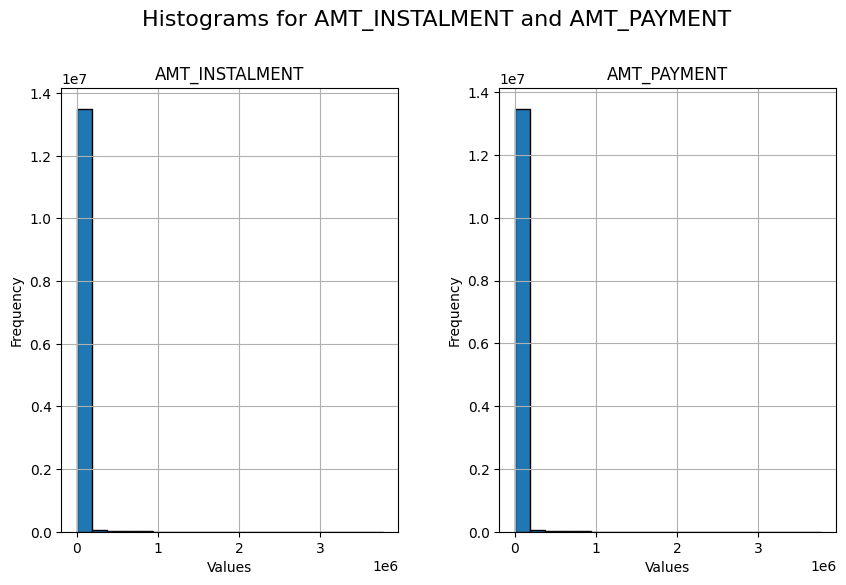

In [ ]:
# Create a histogram for AMT_INSTALMENT and AMT_PAYMENT
installments_payments[["AMT_INSTALMENT", "AMT_PAYMENT"]].hist(bins=20, figsize=(10, 6), layout=(1, 2), edgecolor="black")

# Add titles and labels for clarity
plt.suptitle("Histograms for AMT_INSTALMENT and AMT_PAYMENT", fontsize=16)
plt.subplots_adjust(top=0.85)

for ax, column_name in zip(plt.gcf().axes, ["AMT_INSTALMENT", "AMT_PAYMENT"]):
    ax.set_title(column_name)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

plt.show()

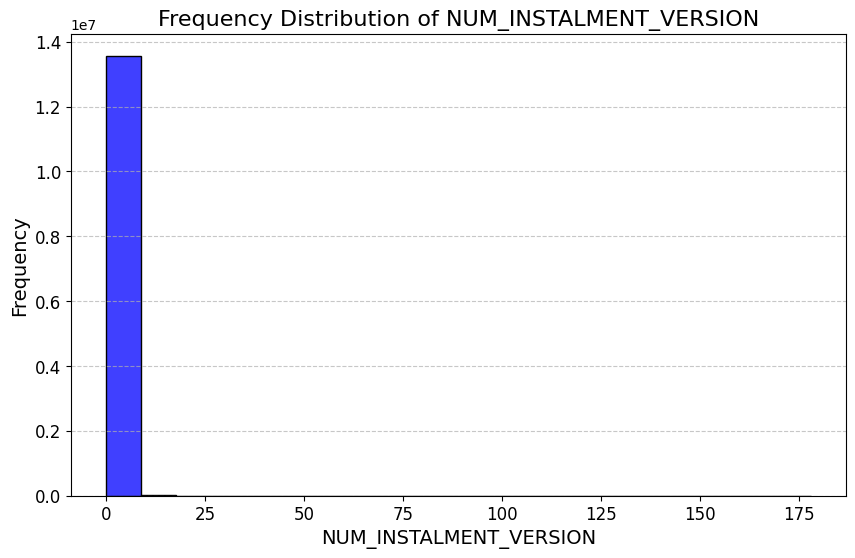

In [ ]:
# Plotting the distribution of NUM_INSTALMENT_VERSION as a bar graph
plt.figure(figsize=(10, 6))
sns.histplot(data=installments_payments, x='NUM_INSTALMENT_VERSION', bins=20, kde=False, color='blue')
plt.title('Frequency Distribution of NUM_INSTALMENT_VERSION', fontsize=16)
plt.xlabel('NUM_INSTALMENT_VERSION', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# If almost all values are identical or close to zero, the feature does not add meaningful variation to the model.

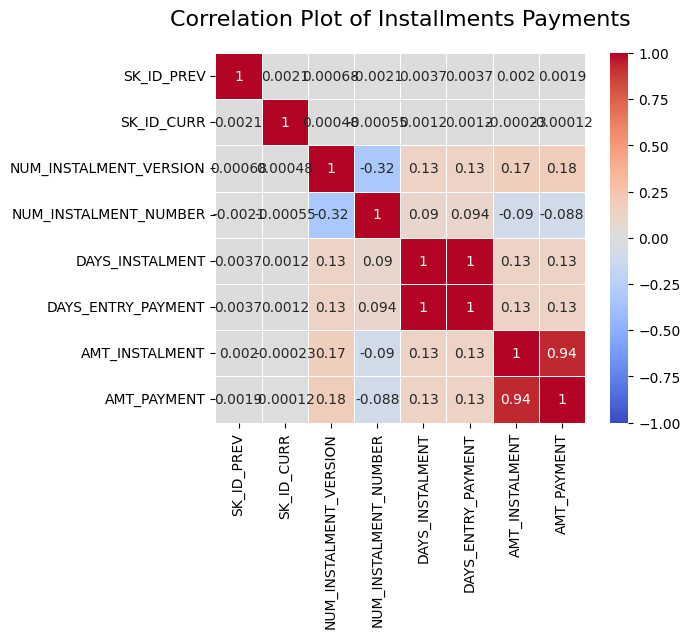

In [ ]:
#Correlation Plot

sns.heatmap(
    installments_payments.corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)

# Add a title to the plot
plt.title("Correlation Plot of Installments Payments", fontsize=16, pad=20)

# Display the plot
plt.show()

In [ ]:
#unique loan ids vs Number of rows corresponding to each loan ID
# Assuming installments_payments['SK_ID_CURR'] is your column of loan IDs
id_ip, num_rows_ip = np.unique(installments_payments['SK_ID_CURR'], return_counts=True)

# Create a dictionary of unique loan IDs and row counts
loan_id_dict_ip = dict(zip(id_ip, num_rows_ip))

# Print the first N values, e.g., the first 10 unique loan IDs and their row counts
print({k: loan_id_dict_ip[k] for k in list(loan_id_dict_ip.keys())[:10]})

{100001: 7, 100002: 19, 100003: 25, 100004: 3, 100005: 9, 100006: 16, 100007: 66, 100008: 35, 100009: 51, 100010: 10}


In [ ]:
# Testing some potential new features

# new feature 1: Days past due (time difference between prescribed installment day and actually paid day)
installments_payments2 = installments_payments.copy()
installments_payments2['payment_delay_days'] = installments_payments2['DAYS_ENTRY_PAYMENT'] - installments_payments2['DAYS_INSTALMENT']
# new feature 2: Measures the gap between the expected installment and the actual payment
installments_payments2['amt_payment_difference'] = installments_payments2['AMT_INSTALMENT'] - installments_payments2['AMT_PAYMENT']
# new feature 3: Provides a normalized view of payment behavior as a ratio
installments_payments2['payment_to_installment_ratio'] = installments_payments2['AMT_PAYMENT'] / installments_payments2['AMT_INSTALMENT']


In [ ]:
# Retains only late payments
installments_payments2['payment_delay_days'] > 0

0           False
1           False
2           False
3           False
4            True
            ...  
13605396    False
13605397    False
13605398    False
13605399    False
13605400    False
Name: payment_delay_days, Length: 13605401, dtype: bool

In [ ]:
# total delay in payment days across all installments for each loan
installments_payments2.groupby('SK_ID_CURR')['payment_delay_days'].sum().sort_values()

SK_ID_CURR
134734   -10529.0
282078    -8640.0
158153    -8517.0
373923    -7919.0
142714    -7828.0
           ...   
242023    40303.0
403582    41310.0
291047    45611.0
228577    54706.0
184984    82905.0
Name: payment_delay_days, Length: 339587, dtype: float64

In [ ]:
# Aggregating payment delays for feature engineering. This is to see if we should just select one aggregation or if these are reflecting different things.
delay_features = installments_payments2.groupby('SK_ID_CURR')['payment_delay_days'].agg(
    total_delay='sum',
    average_delay='mean',
    max_delay='max',
    delay_variability='std'
).reset_index()
delay_features_correlations = delay_features.corr()
delay_features_correlations

# Based on the results, include average_delay as the primary feature (captures typical lateness per installment).
# Optionally include max_delay if extreme delays are meaningful in your context.
# Skip delay_variability since it overlaps heavily with max_delay.
# Skip total_delay unless we need to analyze cumulative effects.

SK_ID_CURR  total_delay  average_delay  max_delay  \
SK_ID_CURR           1.000000    -0.000307       0.002515   0.003668   
total_delay         -0.000307     1.000000       0.465858   0.308408   
average_delay        0.002515     0.465858       1.000000   0.484500   
max_delay            0.003668     0.308408       0.484500   1.000000   
delay_variability    0.002583     0.202130       0.423768   0.853914   

                   delay_variability  
SK_ID_CURR                  0.002583  
total_delay                 0.202130  
average_delay               0.423768  
max_delay                   0.853914  
delay_variability           1.000000

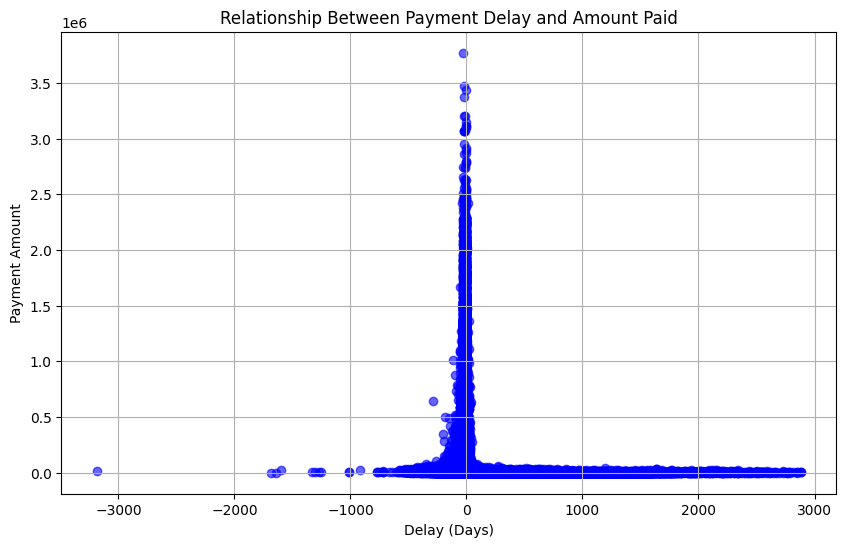

In [ ]:
# Explore relationship between payment delays and amount of payment to see if larger payments lead to more delay
plt.figure(figsize=(10, 6))
plt.scatter(installments_payments2['payment_delay_days'], installments_payments2['AMT_INSTALMENT'], alpha=0.6, color='blue')
plt.title("Relationship Between Payment Delay and Amount Paid")
plt.xlabel("Delay (Days)")
plt.ylabel("Payment Amount")
plt.grid(True)
plt.show()
# Most data points are clustered around zero on the x-axis (Delay (Days)), indicating that a large majority of payments were made close to their due date, with minimal delay
# There are significant delays (both negative and positive), suggesting some payments were made either very early or very late
# There is no apparent linear or clear trend between the delay days and payment amounts
# Could make sense to create some binary feature of on-time vs delayed

In [ ]:
# Aggregating payment the features at SK_ID_CURR level
payment_features = installments_payments2.groupby('SK_ID_CURR').agg(
    total_payment_difference=('amt_payment_difference', 'sum'),
    average_payment_difference=('amt_payment_difference', 'mean'),
    max_payment_difference=('amt_payment_difference', 'max'),
    min_payment_difference=('amt_payment_difference', 'min'),
    variability_payment_difference=('amt_payment_difference', 'std'),
    average_payment_ratio=('payment_to_installment_ratio', 'mean'),
    max_payment_ratio=('payment_to_installment_ratio', 'max'),
    min_payment_ratio=('payment_to_installment_ratio', 'min'),
    variability_payment_ratio=('payment_to_installment_ratio', 'std')
).reset_index()
payment_features_correlation = payment_features.corr()
payment_features_correlation
# Keep total_payment_difference to summarize overall surplus or deficit behavior. Clients with high variability in payment behavior (either differences or ratios) may indicate financial instability.
# Keep variability_payment_difference for capturing inconsistency in payments
# Keep average_payment_ratio to represent normalized payment behavior.

SK_ID_CURR  total_payment_difference  \
SK_ID_CURR                        1.000000                 -0.001165   
total_payment_difference         -0.001165                  1.000000   
average_payment_difference       -0.000956                  0.739070   
max_payment_difference            0.003482                  0.230425   
min_payment_difference           -0.000798                  0.790384   
variability_payment_difference    0.000917                 -0.694013   
average_payment_ratio            -0.004663                 -0.010137   
max_payment_ratio                -0.003151                 -0.010909   
min_payment_ratio                -0.003041                 -0.159570   
variability_payment_ratio        -0.004124                 -0.009681   

                                average_payment_difference  \
SK_ID_CURR                                       -0.000956   
total_payment_difference                          0.739070   
average_payment_difference                        1.000000   
max_payment_difference                            0.170516   
min_payment_difference                            0.664435   
variability_payment_difference                   -0.788507   
average_payment_ratio                            -0.015045   
max_payment_ratio                                -0.008489   
min_payment_ratio                                -0.163880   
variability_payment_ratio                        -0.010852   

                                max_payment_difference  \
SK_ID_CURR                                    0.003482   
total_payment_difference                      0.230425   
average_payment_difference                    0.170516   
max_payment_difference                        1.000000   
min_payment_difference                       -0.071005   
variability_payment_difference                0.189095   
average_payment_ratio                         0.000536   
max_payment_ratio                             0.006221   
min_payment_ratio                            -0.528995   
variability_payment_ratio                     0.003988   

                                min_payment_difference  \
SK_ID_CURR                                   -0.000798   
total_payment_difference                      0.790384   
average_payment_difference                    0.664435   
max_payment_difference                       -0.071005   
min_payment_difference                        1.000000   
variability_payment_difference               -0.914458   
average_payment_ratio                        -0.007971   
max_payment_ratio                            -0.010704   
min_payment_ratio                             0.052929   
variability_payment_ratio                    -0.009052   

                                variability_payment_difference  \
SK_ID_CURR                                            0.000917   
total_payment_difference                             -0.694013   
average_payment_difference                           -0.788507   
max_payment_difference                                0.189095   
min_payment_difference                               -0.914458   
variability_payment_difference                        1.000000   
average_payment_ratio                                 0.010821   
max_payment_ratio                                     0.009809   
min_payment_ratio                                    -0.107121   
variability_payment_ratio                             0.010345   

                                average_payment_ratio  max_payment_ratio  \
SK_ID_CURR                                  -0.004663          -0.003151   
total_payment_difference                    -0.010137          -0.010909   
average_payment_difference                  -0.015045          -0.008489   
max_payment_difference                       0.000536           0.006221   
min_payment_difference                      -0.007971          -0.010704   
variability_payment_difference               0.010821           0.009809   
average_payment_rat

## **3.8 POS and Cash Balance Table EDA**

We now do missing value and correlation analysis on our last secondary dataset.

In [ ]:
pos_cash = datasets["POS_CASH_balance"]
pos_cash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
pos_cash.shape

(10001358, 8)

In [ ]:
pos_cash.describe() #describe numerical features

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [ ]:
## Missing data for pos_cash
percent_pos = (pos_cash.isnull().sum()/pos_cash.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing_pos = pos_cash.isna().sum().sort_values(ascending = False)
missing_pos = pd.concat([percent_pos, sum_missing_pos], axis=1, keys=['Percent', "Missing Count"])
missing_pos.head(20)

Percent  Missing Count
CNT_INSTALMENT_FUTURE     0.26          26087
CNT_INSTALMENT            0.26          26071
SK_ID_PREV                0.00              0
SK_ID_CURR                0.00              0
MONTHS_BALANCE            0.00              0
NAME_CONTRACT_STATUS      0.00              0
SK_DPD                    0.00              0
SK_DPD_DEF                0.00              0

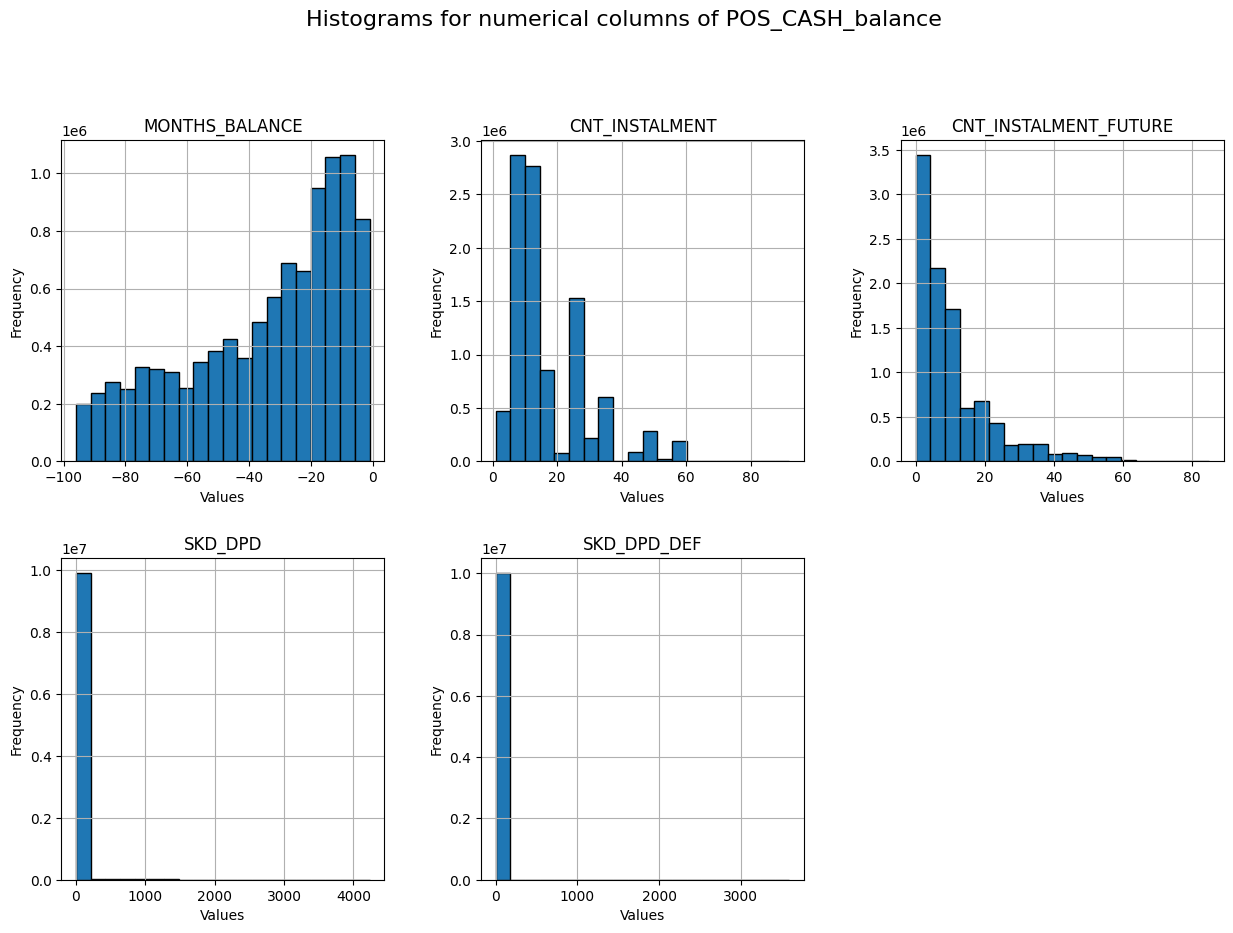

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create a histogram for DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT
pos_cash[['MONTHS_BALANCE', 'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD','SK_DPD_DEF']].hist(bins=20, figsize=(15, 10), layout=(2, 3), edgecolor="black")

# Add titles and labels for clarity
plt.suptitle("Histograms for numerical columns of POS_CASH_balance", fontsize=16)
plt.subplots_adjust(top=0.85)

for ax, column_name in zip(plt.gcf().axes, ["MONTHS_BALANCE", "CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "SKD_DPD", "SKD_DPD_DEF"]):
    ax.set_title(column_name)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

plt.show()

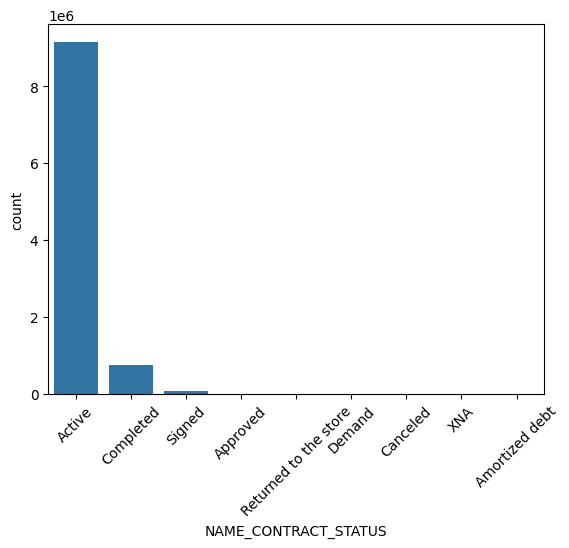

In [ ]:
# Barplot of NAME_CONTRACT_STATUS
sns.countplot(x="NAME_CONTRACT_STATUS", data=pos_cash)
plt.xticks(rotation=45)
plt.show()

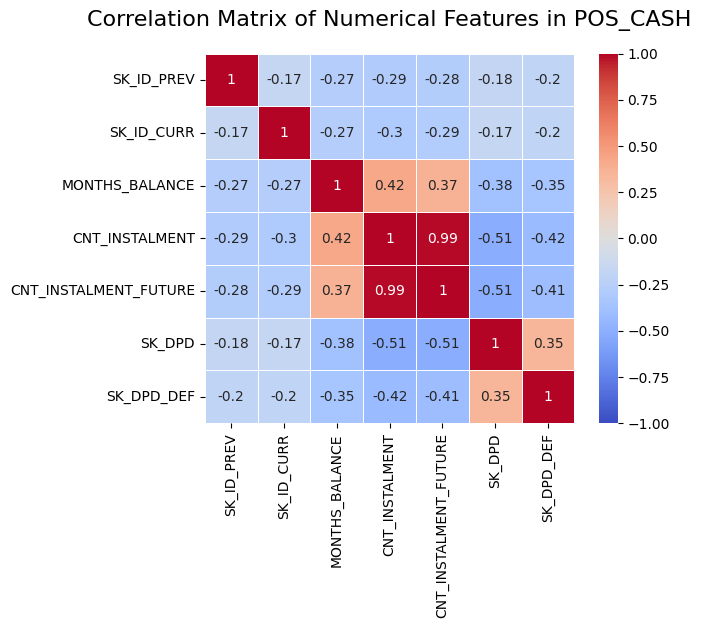

In [ ]:
# Correlations
corrmat_pos = pos_cash.select_dtypes(include=[float, int]).corr()
sns.heatmap(
    corrmat_pos.corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)

# Add a title to the plot
plt.title("Correlation Matrix of Numerical Features in POS_CASH", fontsize=16, pad=20)

# Display the plot
plt.show()

# **4. Preliminary Pipeline**

<img src="https://i.imgur.com/ZjLegf6.png" width="75%" />

## **4.1 Feature Aggregator Pipelines for Feature Engineering**

In this project, aggregation was a critical step because many of the datasets were provided at a level that did not align with the unique identifier of the loan applications (`SK_ID_CURR`). For example, data such as installment payments, credit card balances, and POS loans contained multiple entries, representing either monthly snapshots or transaction records. This misalignment required us to summarize these datasets at the `SK_ID_CURR` level to effectively integrate them into the primary dataset and make them usable for predictive modeling. Additionally, new features were engineered during aggregation. This is our initial attempt to aggregate and generate new features and we will continue working on it in the next weeks.

The **prevAppsFeaturesAggregater** function handled the ***previous_application*** dataset, which included historical loan applications with multiple rows per client. Aggregation was performed using statistical functions such as min, max, and mean on numeric features like `AMT_APPLICATION` and `AMT_ANNUITY`. A new feature, `range_AMT_APPLICATION`, was created to represent the variability in requested loan amounts. This variability is meaningful for predicting whether a client is likely to repay because it provides insight into the consistency or fluctuation in their financial needs over time.

The **BureauFeaturesAggregater** function processed the ***bureau*** dataset, which contained records of clients’ previous credits with other institutions. It included features such as `AMT_CREDIT_SUM` and `AMT_CREDIT_SUM_OVERDUE`. A new feature, `OVERDUE_CREDIT_RATIO`, was created to represent the ratio of overdue credit to the total credit. This ratio is a key indicator of financial risk, as a high value suggests difficulty in managing credit obligations. Missing values in the overdue amounts were handled during aggregation.

The **CreditCardBalanceFeatureEngineer** and **CreditCardBalanceAggregator** functions worked on the **credit_card_balance** dataset, which contained monthly records for clients’ credit cards. These functions created features like `CREDIT_UTIL_RATIO`, the ratio of balance to credit limit, and `DPD_MAX`, the maximum days past due across months. Missing values were also handled. We are still working on this function so these features were not selected to be part of our baseline model.

The **InstallmentsFeaturesAggregater** function aggregated data from the ***installments_payments*** dataset, which detailed individual loan installment records. It created features such as `payment_delay_days` (difference between scheduled and actual payment dates) and `payment_to_installment_ratio` (proportion of payment made relative to the installment amount). Aggregating these features allows the model to capture repayment patterns over time, such as chronic late payments or consistent shortfalls in payment amounts. Missing values in the payment data were replaced with expected values to reflect on-time payments when no delays were recorded.

The **POSCashBalanceFeaturesAggregater** function aggregated the ***POS_CASH_balance*** dataset, which tracked the status of POS and cash loans. This dataset included fields such as `SK_DPD` (days past due) and `CNT_INSTALMENT_FUTURE` (remaining installments). New features, like `POS_REMAINING_INSTALMENTS_RATIO`, which calculated the ratio of remaining installments to total installments, were engineered to highlight repayment progress.


In [ ]:
# Import libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np

### **4.1.1 Previous Application Feature Aggregator**

In [ ]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            #self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] = ['min', 'max', 'mean']

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = ['_'.join(col).strip() for col in result.columns]
        #result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"


from sklearn.pipeline import make_pipeline
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")

df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

### **4.1.2. Bureau Table Feature Aggregator**

Aggregate AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, and AMT_ANNUITY to get usable information about each client's (SK_ID_CURR) overall credit, debt, credit limits, overdue credit, and annuity from the credit bureau. Create OVERDUE_CREDIT_RATIO which shows each client's ratio of overdue credit to total credit because past overdue credit may be a good indicator of whether a client will repay a loan.

In [ ]:
bureau_features = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY']
class BureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
      self.features = features
      self.agg_op_features = {}
      for f in features:
        self.agg_op_features[f] = ['min', 'max', 'mean']

    def fit(self, X, y=None):
      return self

    def transform(self, X, y=None):
    # Create overdue credit ratio
      sum_overdue_credit = X.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum()
      sum_total_credit = X.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
      overdue_credit_ratio = sum_overdue_credit/sum_total_credit

      result = X.groupby('SK_ID_CURR').agg(self.agg_op_features)
      result.columns = ['_'.join(col).strip() for col in result.columns]

      result['OVERDUE_CREDIT_RATIO'] = overdue_credit_ratio

      return result


from sklearn.pipeline import make_pipeline
def test_driver_BureauFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(BureauFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))

bureau_features = ['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY']
res = test_driver_BureauFeaturesAggregater(bureau, bureau_features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")


df.shape: (1716428, 17)

df[['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY']][0:5]: 
   AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0         91323.0                  0.0                   NaN   
1        225000.0             171342.0                   NaN   
2        464323.5                  NaN                   NaN   
3         90000.0                  NaN                   NaN   
4       2700000.0                  NaN                   NaN   

   AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  
0                     0.0          NaN  
1                     0.0          NaN  
2                     0.0          NaN  
3                     0.0          NaN  
4                     0.0          NaN  
HELLO
Test driver: 
            AMT_CREDIT_SUM_min  AMT_CREDIT_SUM_max  AMT_CREDIT_SUM_mean  \
SK_ID_CURR                                                                
100001                 85500.0            378000.0      

### **4.1.3 Credit Card Balance Feature Aggregator**

In [ ]:
ds_name = 'credit_card_balance'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
ccb = datasets['credit_card_balance']
ccb_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT', # Reduced number of features
               'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT' ]

class CreditCardFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
      self.features = features
      self.agg_op_features = {}
      for f in features:
        self.agg_op_features[f] = ['min', 'max', 'mean'] # Modified from 'sum' to 'min'

    def fit(self, X, y=None):
      return self

    def transform(self, X, y=None):
    # Handle missing values for the numerical features by filling with zeros
        X = X.fillna(0)

    # Create new features
        credit_util_ratio = X['AMT_BALANCE'] / X['AMT_CREDIT_LIMIT_ACTUAL']
        payment_draw_ratio = X['AMT_PAYMENT_TOTAL_CURRENT'] / X['AMT_DRAWINGS_CURRENT']
        amt_drawings_total = X['AMT_DRAWINGS_CURRENT'] + X['AMT_DRAWINGS_OTHER_CURRENT'] + X['AMT_DRAWINGS_POS_CURRENT']
        cnt_drawings_total = X['CNT_DRAWINGS_CURRENT'] + X['CNT_DRAWINGS_ATM_CURRENT'] + X['CNT_DRAWINGS_OTHER_CURRENT']
        dpd_max = X[['SK_DPD', 'SK_DPD_DEF']].max(axis=1)

    # Aggregate features at SK_ID_CURR level
        result = X.groupby('SK_ID_CURR').agg(self.agg_op_features)
        result.columns = ['_'.join(col).strip() for col in result.columns]

    # Add the newly calculated features to the aggregated result
        result['CREDIT_UTIL_RATIO'] = credit_util_ratio.groupby(X['SK_ID_CURR']).mean()
        result['PAYMENT_DRAW_RATIO'] = payment_draw_ratio.groupby(X['SK_ID_CURR']).mean()
        result['AMT_DRAWINGS_TOTAL'] = amt_drawings_total.groupby(X['SK_ID_CURR']).mean()
        result['CNT_DRAWINGS_TOTAL'] = cnt_drawings_total.groupby(X['SK_ID_CURR']).mean()
        result['DPD_MAX'] = dpd_max.groupby(X['SK_ID_CURR']).max()

        return result


from sklearn.pipeline import make_pipeline
def test_driver_CreditCardFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(CreditCardFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))

ccb_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT', # Reduced number of features
               'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT' ]

res = test_driver_CreditCardFeaturesAggregater(ccb, ccb_features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

df.shape: (3840312, 23)

df[['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT']][0:5]: 
   AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_CURRENT  \
0       56.970                   135000                 877.5   
1    63975.555                    45000                2250.0   
2    31815.225                   450000                   0.0   
3   236572.110                   225000                2250.0   
4   453919.455                   450000               11547.0   

   AMT_PAYMENT_TOTAL_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_ATM_CURRENT  
0                     1800.0                     1                       0.0  
1                     2250.0                     1                       1.0  
2                     2250.0                     0                       0.0  
3                    11925.0                     1                       1.0  
4                    27000.0  

### 4.1.4. Installments Payments Feature Aggregator

In [ ]:
class InstallmentsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.delay_agg_op = {
            'payment_delay_days': ['mean', 'max']  # Include average_delay and max_delay
        }
        self.payment_agg_op = {
            'amt_payment_difference': ['sum', 'std'],  # Include total_payment_difference and variability_payment_difference
            'payment_to_installment_ratio': ['mean', 'max']  # Include average_payment_ratio and max_payment_ratio
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Handle missing values for payment-related features:
        # - Fill missing 'DAYS_ENTRY_PAYMENT' (actual payment day) with 'DAYS_INSTALMENT' (scheduled payment day)
        #   to assume payments were made on time when actual payment data is unavailable.
        # - Fill missing 'AMT_PAYMENT' (actual payment amount) with 'AMT_INSTALMENT' (expected payment amount)
        #   to assume the expected amount was paid when actual payment data is unavailable. Missing values are only 2% of the data
        X['DAYS_ENTRY_PAYMENT'] = X['DAYS_ENTRY_PAYMENT'].fillna(X['DAYS_INSTALMENT'])
        X['AMT_PAYMENT'] = X['AMT_PAYMENT'].fillna(X['AMT_INSTALMENT'])

        # Create new features
        X['payment_delay_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT']
        X['amt_payment_difference'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT']
        X['payment_to_installment_ratio'] = X['AMT_PAYMENT'] / X['AMT_INSTALMENT']

        # Aggregate delay features
        delay_features = X.groupby('SK_ID_CURR').agg(self.delay_agg_op)
        delay_features.columns = ['_'.join(col).strip() for col in delay_features.columns]

        # Aggregate payment features
        payment_features = X.groupby('SK_ID_CURR').agg(self.payment_agg_op)
        payment_features.columns = ['_'.join(col).strip() for col in payment_features.columns]

        # Combine both aggregated features
        aggregated_features = pd.concat([delay_features, payment_features], axis=1)

        return aggregated_features.reset_index()

# Test function for the updated InstallmentsFeaturesAggregater
def test_driver_InstallmentsFeaturesAggregater(df):
    print(f"df.shape: {df.shape}\n")
    print(f"Sample df columns: {df.columns}")
    test_pipeline = make_pipeline(InstallmentsFeaturesAggregater())
    result = test_pipeline.fit_transform(df)
    return result

# Sample test
installments_features = test_driver_InstallmentsFeaturesAggregater(installments_payments2)
print(f"Aggregated Installments Features:\n{installments_features.head()}")

df.shape: (13605401, 11)

Sample df columns: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'payment_delay_days',
       'amt_payment_difference', 'payment_to_installment_ratio'],
      dtype='object')
Aggregated Installments Features:
   SK_ID_CURR  payment_delay_days_mean  payment_delay_days_max  \
0      100001                -7.285714                    11.0   
1      100002               -20.421053                   -12.0   
2      100003                -7.160000                    -1.0   
3      100004                -7.666667                    -3.0   
4      100005               -23.555556                     1.0   

   amt_payment_difference_sum  amt_payment_difference_std  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0

### **4.1.5 POS CASH balance Feature Aggregator**

In [ ]:
class POSCashBalanceFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numerical_agg_op = {
            'SK_DPD_DEF': ['max', 'mean', 'min'],  # Delays with a legal default
            'SK_DPD': ['max', 'mean', 'min'],      # Days past due
            'MONTHS_BALANCE': ['max', 'mean', 'size'],  # Tracking loan duration
            'CNT_INSTALMENT': ['max', 'size'],     # Total installments
            'CNT_INSTALMENT_FUTURE': ['max', 'size', 'sum']  # Remaining installments
        }
        self.categorical_agg_op = {}  # Placeholder for one-hot-encoded columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
      # One-hot encode `NAME_CONTRACT_STATUS`
      one_hot = pd.get_dummies(X['NAME_CONTRACT_STATUS'], prefix='NAME_CONTRACT_STATUS')
      X = pd.concat([X, one_hot], axis=1)

      # Add one-hot encoded columns to categorical aggregations
      for col in one_hot.columns:
          self.categorical_agg_op[col] = ['mean']

      # Aggregate numerical features at SK_ID_CURR level
      numerical_agg = X.groupby('SK_ID_CURR').agg(self.numerical_agg_op)
      numerical_agg.columns = ['POS_' + '_'.join(col).upper() for col in numerical_agg.columns]

      # Aggregate categorical features at SK_ID_CURR level
      categorical_agg = X.groupby('SK_ID_CURR').agg(self.categorical_agg_op)
      categorical_agg.columns = ['POS_' + '_'.join(col).upper() for col in categorical_agg.columns]

      # Combine numerical and categorical features
      aggregated_features = pd.concat([numerical_agg, categorical_agg], axis=1)

      # Reset index to make 'SK_ID_CURR' a column
      aggregated_features = aggregated_features.reset_index()

      # Loan-level features (SK_ID_PREV level)
      X_sorted = X.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'])
      pos_group = X_sorted.groupby('SK_ID_PREV')

      loan_level_features = pd.DataFrame()
      loan_level_features['SK_ID_CURR'] = pos_group['SK_ID_CURR'].first()
      loan_level_features['POS_LOAN_COMPLETED_MEAN'] = pos_group['NAME_CONTRACT_STATUS_Completed'].mean()
      loan_level_features['POS_COMPLETED_BEFORE_MEAN'] = (
          pos_group['CNT_INSTALMENT'].first() - pos_group['CNT_INSTALMENT'].last()
      )
      loan_level_features['POS_COMPLETED_BEFORE_MEAN'] = loan_level_features.apply(
          lambda x: 1 if x['POS_COMPLETED_BEFORE_MEAN'] > 0 and x['POS_LOAN_COMPLETED_MEAN'] > 0 else 0, axis=1
      )
      loan_level_features['POS_REMAINING_INSTALMENTS'] = pos_group['CNT_INSTALMENT_FUTURE'].last()
      loan_level_features['POS_REMAINING_INSTALMENTS_RATIO'] = (
          pos_group['CNT_INSTALMENT_FUTURE'].last() / pos_group['CNT_INSTALMENT'].last()
      ).fillna(0)  # Handle potential division by zero

      # Aggregate loan-level features to SK_ID_CURR level
      loan_level_agg = loan_level_features.groupby('SK_ID_CURR').sum().reset_index()

      # Merge aggregated features with loan-level features
      final_agg = pd.merge(aggregated_features, loan_level_agg, on='SK_ID_CURR', how='left')

      return final_agg

# Test function for the updated POSCashBalanceFeaturesAggregater
def test_driver_POSCashBalanceFeaturesAggregater(df):
    print(f"df.shape: {df.shape}\n")
    print(f"Sample df columns: {df.columns}")
    test_pipeline = make_pipeline(POSCashBalanceFeaturesAggregater())
    result = test_pipeline.fit_transform(df)
    return result

# Sample test
pos_cash_features = test_driver_POSCashBalanceFeaturesAggregater(pos_cash)
print(f"Aggregated Installments Features:\n{pos_cash_features.head()}")

df.shape: (10001358, 8)

Sample df columns: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')
Aggregated Installments Features:
   SK_ID_CURR  POS_SK_DPD_DEF_MAX  POS_SK_DPD_DEF_MEAN  POS_SK_DPD_DEF_MIN  \
0      100001                   7             0.777778                   0   
1      100002                   0             0.000000                   0   
2      100003                   0             0.000000                   0   
3      100004                   0             0.000000                   0   
4      100005                   0             0.000000                   0   

   POS_SK_DPD_MAX  POS_SK_DPD_MEAN  POS_SK_DPD_MIN  POS_MONTHS_BALANCE_MAX  \
0               7         0.777778               0                     -53   
1               0         0.000000               0                      -1   
2               0         0.000000    

## 4.2 Merge secondary Datasets into Primary Dataset

Once the secondary datasets were aggregated, we merged them sequentially into the primary application dataset using a left join on `SK_ID_CURR`. Each merge operation appended the aggregated features from the secondary dataset to the primary dataset. The same transformations and merging process were applied to the Kaggle test dataset.


In [ ]:
from sklearn.pipeline import Pipeline

# Initialize pipelines for each dataset
bureau_feature_pipeline = Pipeline([
    ('bureau_aggregater', BureauFeaturesAggregater(bureau_features))
])

credit_card_feature_pipeline = Pipeline([
    ('credit_card_aggregater', CreditCardBalanceFeatureEngineer())
])

installments_feature_pipeline = Pipeline([
    ('installments_aggregater', InstallmentsFeaturesAggregater())
])

pos_cash_feature_pipeline = Pipeline([
    ('pos_cash_aggregater', POSCashBalanceFeaturesAggregater())
])

prev_apps_feature_pipeline = Pipeline([
    ('prev_apps_aggregater', prevAppsFeaturesAggregater(features))
])

# Example datasets
X_train = datasets['application_train']  # Primary dataset
bureau = datasets['bureau']
credit_card_balance = datasets['credit_card_balance']
installments = datasets['installments_payments']
pos_cash = datasets['POS_CASH_balance']
previous_apps = datasets['previous_application']

merge_all_data = True

if merge_all_data:
    # 1. Transform and merge Bureau data
    bureau_aggregated = bureau_feature_pipeline.transform(bureau)
    X_train = X_train.merge(bureau_aggregated, how='left', on='SK_ID_CURR')

    # # 2. Transform and merge Credit Card Balance data
    # credit_card_aggregated = credit_card_feature_pipeline.transform(credit_card_balance)
    # X_train = X_train.merge(credit_card_aggregated, how='left', on='SK_ID_CURR')

    # 3. Transform and merge Installments data
    installments_aggregated = installments_feature_pipeline.transform(installments)
    X_train = X_train.merge(installments_aggregated, how='left', on='SK_ID_CURR')

    # 4. Transform and merge POS Cash Balance data
    pos_cash_aggregated = pos_cash_feature_pipeline.transform(pos_cash)
    X_train = X_train.merge(pos_cash_aggregated, how='left', on='SK_ID_CURR')

    # 5. Transform and merge Previous Applications data
    previous_apps_aggregated = prev_apps_feature_pipeline.transform(previous_apps)
    X_train = X_train.merge(previous_apps_aggregated, how='left', on='SK_ID_CURR')

# Print resulting dataset shape and columns for verification
print(f"Transformed X_train shape: {X_train.shape}")
print(f"Columns in transformed X_train: {X_train.columns}")


Transformed X_train shape: (307511, 178)
Columns in transformed X_train: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'POS_COMPLETED_BEFORE_MEAN', 'POS_REMAINING_INSTALMENTS',
       'POS_REMAINING_INSTALMENTS_RATIO', 'AMT_ANNUITY_min_y',
       'AMT_ANNUITY_max_y', 'AMT_ANNUITY_mean_y', 'AMT_APPLICATION_min',
       'AMT_APPLICATION_max', 'AMT_APPLICATION_mean', 'range_AMT_APPLICATION'],
      dtype='object', length=178)


# **5. Experiments**

We implemented a baseline pipeline using a combination of target encoding, mean imputation, and logistic regression to create an initial model for our data. To address missing and extreme values, we replaced infinite values with NaNs in the training dataset and handled categorical variables using a target encoder. Numerical features with missing values were imputed with their mean. The categorical features were automatically identified for encoding.

After fitting the baseline pipeline on the training data, we evaluate the model using key performance metrics, including accuracy, ROC-AUC, precision, recall, F1-score, and log loss, across the training, validation, and test sets. The results are recorded in an experiment log (expLog) for tracking and comparison. This baseline serves as a foundation for understanding the dataset and benchmarking subsequent model improvements for upcoming weeks.

In [ ]:
# Test/Train Split
y_train = X_train['TARGET']

In [ ]:
X_train = X_train.drop(columns=['TARGET'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
!pip install category_encoders

## **5.1 Baseline Model: Logistic Regression**

In [ ]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression

X_train = X_train.replace([np.inf, -np.inf], np.nan)

baseline_pipeline = Pipeline([
    ('target_encoder', TargetEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic_regression', LogisticRegression())
])

# Get a list of categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()


baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('target_encoder',
                 TargetEncoder(cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                     'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                     'NAME_EDUCATION_TYPE',
                                     'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                     'OCCUPATION_TYPE',
                                     'WEEKDAY_APPR_PROCESS_START',
                                     'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                                     'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                                     'EMERGENCYSTATE_MODE'],
                               handle_unknown='ignore')),
                ('imputer', SimpleImputer()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, baseline_pipeline.predict(X_train)), 3)

0.92

## **5.2 Evaluation metrics**



To evaluate our models for the HCDR dataset, we are using accuracy, precision, recall, F1 score, AUC-ROC, and log loss metrics, which are common metrics used to evaluate classification models. The table below contains a description and formula for each metric.


| Name                               | Description                                                                                     | Formula                                                                                       |
|------------------------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| Accuracy                           | Proportion of correctly predicted samples out of the total samples                              | $$\text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{True Positives + True Negatives + False Positives + False Negatives}}$$ |
| Precision                          | Proportion of true positive predictions out of all positive predictions                         | $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$ |
| Recall (Sensitivity)               | Proportion of actual positives correctly identified                                             | $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$ |
| F1 Score                           | Harmonic mean of precision and recall, balancing the two metrics                                | $$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$ |
| AUC-ROC                            | Area under the Receiver Operating Characteristic curve, measuring model's ability to distinguish between classes | $$\text{AUC-ROC} = \int \text{ROC Curve}$$ |
| Log Loss                           | Logarithmic loss penalizes wrong predictions more as they deviate from true class probabilities | $$\text{Log Loss} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$$ |



For this project we will consider 6 metrics: Accuracy, Precision, Recall, F1 Score, AUC-ROC, and Log Loss.

**Accuracy** is the proportion of correctly predicted values divided by the total number of predicted values. It basically measures how often a machine learning model correctly predicts the outcome. This metric doesn't work well if the data set is imbalanced, meaning the overwhelming majority of the Target variables have the same classification.  

**Precision** is the proportion of true positive values predicted to the total number of positive values predicted. For projects where false positives are less desirable, precision is a good metric choice to minimize them.

**Recall** is the proportion of true positive values predicted to the total number of the true positives and the total number of the false negatives. For projects where false negatives are less desirable, recall is a good metric choice.

**F1 Score** is the harmonic mean of precision and recall. For projects where both false positives and false negatives are similarly weighted then F1 is a good metric choice.

**AUC-ROC** is Area under the Receiver Operating Characteristic curve which measures a model's ability to distinguish between classes. AUC-ROC is a good metric choice for projects with highly imbalanced data sets.

**Log (Logarithmic) loss** penalizes wrong predictions more as they deviate from true class probabilities. Log loss is a good metric choice for balanced and imbalanced data sets but can be sensitive to outliers.

## **5.3 Results**

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, log_loss
roc_auc_score(y_train, baseline_pipeline.predict_proba(X_train)[:, 1])


0.6133692331377036

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=['Experiment_Name', 'Train_Accuracy', 'Valid_Accuracy', 'Test_Accuracy',
           'Train_ROC_AUC', 'Valid_ROC_AUC', 'Test_ROC_AUC',
           'Train_Precision', 'Valid_Precision', 'Test_Precision',
           'Train_Recall', 'Valid_Recall', 'Test_Recall',
           'Train_F1', 'Valid_F1', 'Test_F1',
           'Train_Log_Loss', 'Valid_Log_Loss', 'Test_Log_Loss'])


In [ ]:
exp_name = f"Baseline_{X_train.shape[1]}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, baseline_pipeline.predict(X_train)),
                accuracy_score(y_valid, baseline_pipeline.predict(X_valid)),
                accuracy_score(y_test, baseline_pipeline.predict(X_test)),
                roc_auc_score(y_train, baseline_pipeline.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, baseline_pipeline.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, baseline_pipeline.predict_proba(X_test)[:, 1]),
                precision_score(y_train, baseline_pipeline.predict(X_train)),
                precision_score(y_valid, baseline_pipeline.predict(X_valid)),
                precision_score(y_test, baseline_pipeline.predict(X_test)),
                recall_score(y_train, baseline_pipeline.predict(X_train)),
                recall_score(y_valid, baseline_pipeline.predict(X_valid)),
                recall_score(y_test, baseline_pipeline.predict(X_test)),
                f1_score(y_train, baseline_pipeline.predict(X_train)),
                f1_score(y_valid, baseline_pipeline.predict(X_valid)),
                f1_score(y_test, baseline_pipeline.predict(X_test)),
                log_loss(y_train, baseline_pipeline.predict_proba(X_train)[:, 1]),
                log_loss(y_valid, baseline_pipeline.predict_proba(X_valid)[:, 1]),
                log_loss(y_test, baseline_pipeline.predict_proba(X_test)[:, 1])],

    4))
expLog

Experiment_Name  Train_Accuracy  Valid_Accuracy  Test_Accuracy  \
0  Baseline_177_features          0.9196          0.9158         0.9204   

   Train_ROC_AUC  Valid_ROC_AUC  Test_ROC_AUC  Train_Precision  \
0         0.6134         0.6095        0.6122           0.1852   

   Valid_Precision  Test_Precision  Train_Recall  Valid_Recall  Test_Recall  \
0           0.1111          0.2857        0.0003        0.0003       0.0008   

   Train_F1  Valid_F1  Test_F1  Train_Log_Loss  Valid_Log_Loss  Test_Log_Loss  
0    0.0007    0.0006   0.0015          0.2765          0.2852         0.2748

# **6. Discussion**

**Results**

For our initial baseline model using Logistic Regression, we observed promising yet preliminary results. The model achieved high accuracy across the training, validation, and test sets, with values of 91.96%, 91.58%, and 92.04%, respectively. The ROC-AUC scores, which measure the model's ability to distinguish between classes, were 0.6134, 0.6095, and 0.6122 for the training, validation, and test sets, respectively. These values indicate some predictive capability but leave significant room for improvement. Precision, recall, and F1 scores were considerably low, especially for the minority class. For example, the test precision was 0.2857, while recall was just 0.0008, resulting in a low F1 score of 0.0015, so the model struggles to capture the minority class, which is critical for the task. The imbalance in the dataset likely contributed to the model's low recall and F1 scores, particularly for the minority class, which is critical for this task. Log loss values were consistent across the splits, with test log loss at 0.2748 but this suggests the need for further refinement.

Additionally, we identified similarities and redundancies in features across multiple secondary tables, which may dilute the effectiveness of certain variables. To address this, we plan to analyze correlations among all fields to identify and eliminate redundant features.

Overall, these results are still in the experimental phase. There is a clear need to revisit several aspects of the modeling process, including addressing the significant data imbalance, improving feature selection, and exploring more advanced algorithms.

**Interpretation of Results**

In Phase 2, our baseline model using Logistic Regression was designed to predict the risk of loan default by leveraging data from the Home Credit Default Risk competition. The results provide a benchmark for evaluating future models. Key findings include:

- Feature Engineering Impact: Aggregated features, such as credit balances and counts of past loans, improved model interpretability. The added financial behaviors provided essential context for risk predictions.

- Model Performance Metrics: The baseline Logistic Regression achieved an accuracy of approximately 0.92 on the training set. Other metrics, including ROC-AUC (0.61), precision, recall, F1 score, and log loss, were assessed to evaluate classification performance. These metrics demonstrated reasonable initial predictive capacity but highlighted potential gaps, such as handling data imbalance.

**Comparative Analysis**

The baseline results offer a reference point against which advanced methodologies in Phase 3 will be compared. While simpler models like Logistic Regression are interpretable, their predictive performance, especially in highly complex datasets, often lags behind more sophisticated approaches, such as ensemble methods or neural networks. Future efforts will focus on improving the predictive power through advanced techniques, informed by these baseline outcomes.

**Limitations and Challenges**

During this phase of the project, we encountered several challenges that have informed our plans for the next phase. One significant limitation was the lack of free collaboration platforms with sufficient advanced resources. We worked locally and utilized Google Colab during Phase 2, but this restricted our ability to scale some of our processing. As a solution, we are exploring the use of virtual machines to run our notebooks.

The size of the datasets also presented a challenge, as processing large datasets increased computational demands and processing time. To address this, we plan to implement dimensionality reduction techniques in Phase 3. Merging datasets proved to be a complex process, as we needed to carefully aggregate and align data from various secondary tables. We intend to include any additional relevant data in Phase 3 to enhance the robustness of our models.

Looking forward to Phase 3, our primary goals include revising and optimizing our features and developing a more robust modeling pipeline. Feature engineering will include creating new features, performing feature selection, and applying dimensionality reduction to improve efficiency and accuracy.

# **7. Conclusion**

Phase 2 of the Home Credit Default Risk project focused on building a baseline model to predict loan default using Logistic Regression. The main hypothesis was that integrating feature engineering from diverse datasets would enhance the model's predictive capability. Our results demonstrated moderate success, achieving an accuracy of 0.92 and highlighting the need for further optimization to handle complex interactions within client data. The significance of these findings is twofold: they underscore the challenges inherent in risk prediction and provide a solid foundation for more advanced modeling in future phases. The primary challenges faced in Phase 2 include handling large, diverse datasets with significant heterogeneity, dealing with missing values, and capturing complex interactions within client data. The model's current limitations, such as a relatively low ROC-AUC, suggest the need for deeper feature engineering and optimization in upcoming phases. Subsequent work will enhance feature selection, model tuning, and explore advanced algorithms to refine prediction accuracy.

# **8. Biography**

- Predict Loan Repayment with Featuretools. (n.d.). GitHub Repository. Retrieved from https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb

- Analytics Vidhya. (2018, August). A Guide to Automated Feature Engineering using Featuretools in Python. Retrieved from https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

- Kanter, J. M., & Veeramachaneni, K. (2015). Deep Feature Synthesis: Towards Automating Data Science Endeavors. 2015 IEEE International Conference on Data Science and Advanced Analytics (DSAA). Retrieved from https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf